# Environment Setup

In [ ]:
# import modules

import pandas as pd # for data viz and wrangling
import numpy as np # for 'numeric python'
import matplotlib.pyplot as plt # for data viz (more complex than pylab)
import seaborn as sns
from pylab import * # for data viz (import * means 'import all of the functions')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn import metrics
from scipy import stats
import statsmodels.api as sm


In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the Data

In [ ]:
# read data
# on the lefthand side, navigate to your data and copy the path
df = pd.read_csv('/content/drive/MyDrive/diabetes_binary_health_indicators_BRFSS2015.csv')

In [ ]:
# Preview
print(df.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [ ]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Several columns are displayed with 0 and 1 indicators, so we converted them to the object data type.

In [ ]:
columns_to_keep_numeric = ['BMI', 'MentHlth', 'PhysHlth']

for col in df.columns:
    if col not in columns_to_keep_numeric:
        df[col] = df[col].astype(str)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  object 
 1   HighBP                253680 non-null  object 
 2   HighChol              253680 non-null  object 
 3   CholCheck             253680 non-null  object 
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  object 
 6   Stroke                253680 non-null  object 
 7   HeartDiseaseorAttack  253680 non-null  object 
 8   PhysActivity          253680 non-null  object 
 9   Fruits                253680 non-null  object 
 10  Veggies               253680 non-null  object 
 11  HvyAlcoholConsump     253680 non-null  object 
 12  AnyHealthcare         253680 non-null  object 
 13  NoDocbcCost           253680 non-null  object 
 14  GenHlth               253680 non-null  object 
 15  

None

In [ ]:
# shape
# shows how many rows and columns
# this sample has 253680 rows and 22 columns
df.shape

(253680, 22)

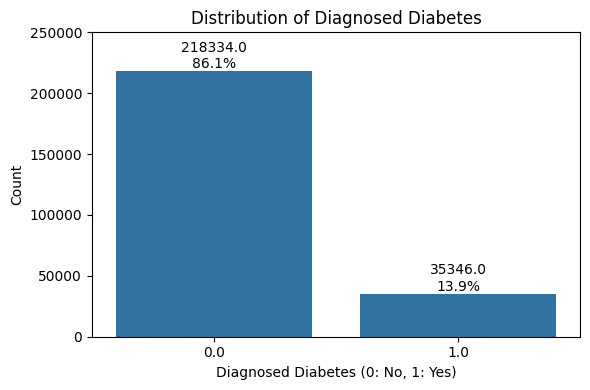

In [ ]:
# distribution of target variable
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Diabetes_binary', data=df)
plt.title('Distribution of Diagnosed Diabetes')
plt.xlabel('Diagnosed Diabetes (0: No, 1: Yes)')
plt.ylabel('Count')
# Add counts and percentages on top of bars
total = len(df)
for container in ax.containers:
    counts = container.datavalues if hasattr(container, 'datavalues') else [p.get_height() for p in container.patches]
    for count, patch in zip(counts, container.patches):
        percentage = count / total * 100
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            patch.get_height(),
            f'{count}\n{percentage:.1f}%',
            ha='center',
            va='bottom'
        )
plt.ylim(0, 250000)
plt.tight_layout()
plt.show()

# Preprocessing

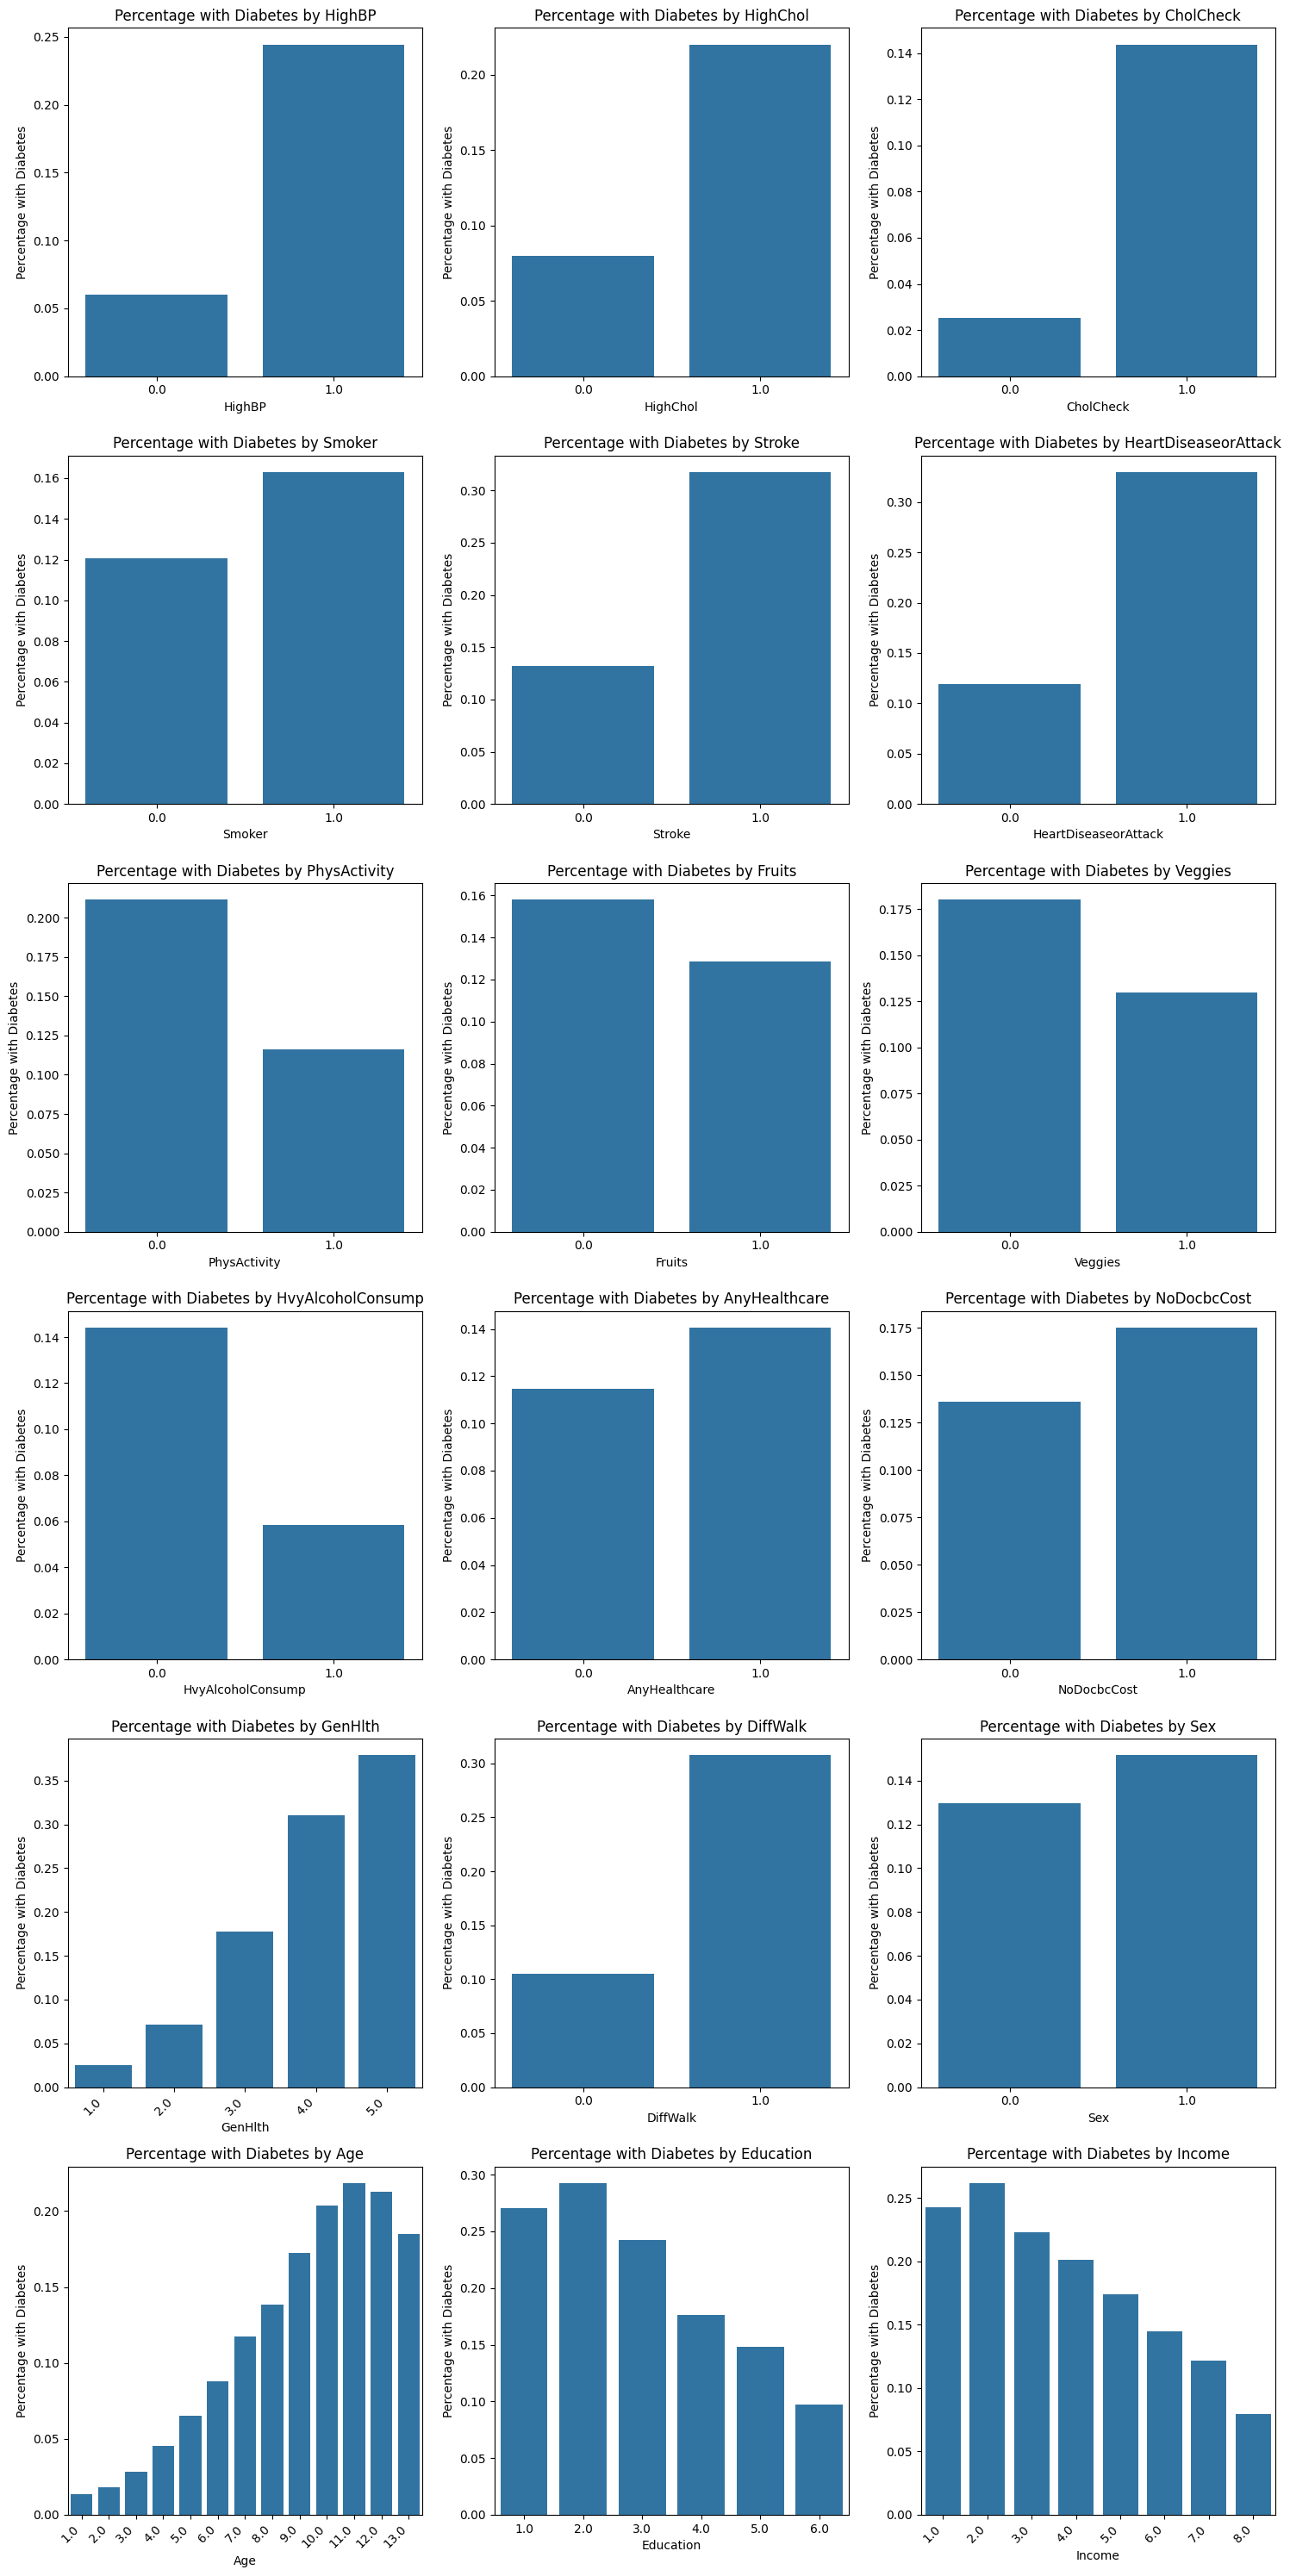

In [ ]:
# Distribution of categorical variables
# Identify categorical columns (excluding 'Diabetes_binary' and numerical columns)
numerical_cols = ['BMI', 'MentHlth', 'PhysHlth']
categorical_features = [col for col in df.columns if col not in numerical_cols and col != 'Diabetes_binary']

features = categorical_features
n_features = len(features)
n_cols = 3  # Adjust the number of columns for displaying plots
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))

# Create a copy to avoid SettingWithCopyWarning when adding binned column
df_subset_plot = df.copy()

# Convert 'Diabetes_binary' to numeric
df_subset_plot['Diabetes_binary'] = pd.to_numeric(df_subset_plot['Diabetes_binary'])

for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    # Check if the column needs to be treated as categorical for plotting
    if col in ['GenHlth', 'Age', 'Income']:
        # Convert to appropriate type and sort unique values
        if col == 'Age':
            df_subset_plot[col] = pd.to_numeric(df_subset_plot[col])
            order = sorted(df_subset_plot[col].unique())
        else:
            df_subset_plot[col] = df_subset_plot[col].astype(str)
            order = sorted(df_subset_plot[col].unique())

        sns.barplot(data=df_subset_plot, x=col, y='Diabetes_binary', errorbar=None, order=order)
        plt.title(f'Percentage with Diabetes by {col}')
        plt.xlabel(col)
        plt.ylabel('Percentage with Diabetes')
        plt.xticks(rotation=45, ha='right')
    elif df_subset_plot[col].dtype in ['float64', 'int64'] and len(df_subset_plot[col].unique()) > 10: # Adjusted threshold for binning
        # Convert to numeric first for binning
        df_subset_plot[f'{col}_numeric'] = pd.to_numeric(df_subset_plot[col])
        # Bin the numerical data and calculate the mean of Diabetes_binary for each bin (percentage with diabetes)
        df_subset_plot[f'{col}_binned'] = pd.cut(df_subset_plot[f'{col}_numeric'], bins=10, duplicates='drop') # Adjust number of bins as needed
        sns.barplot(data=df_subset_plot, x=f'{col}_binned', y='Diabetes_binary', errorbar=None)
        plt.title(f'Percentage with Diabetes by {col} Bins')
        plt.xlabel(col)
        plt.ylabel('Percentage with Diabetes')
        plt.xticks(rotation=45, ha='right')
    else:
        # For other categorical/binary variables, calculate the mean of Diabetes_binary for each category
        # Ensure the column is treated as categorical for plotting
        df_subset_plot[col] = df_subset_plot[col].astype(str)
        order = sorted(df_subset_plot[col].unique())
        sns.barplot(data=df_subset_plot, x=col, y='Diabetes_binary', errorbar=None, order=order)
        plt.title(f'Percentage with Diabetes by {col}')
        plt.xlabel(col)
        plt.ylabel('Percentage with Diabetes')

plt.tight_layout()
plt.show()

# Clean up the binned columns from the copied DataFrame
for col in features:
    if f'{col}_binned' in df_subset_plot.columns:
        df_subset_plot = df_subset_plot.drop(columns=[f'{col}_binned', f'{col}_numeric'])

We observe that all categorical variables exhibit a noticeable pattern or relationship with the target variable (Diabetes); therefore, we will retain all of them at this stage of the analysis.

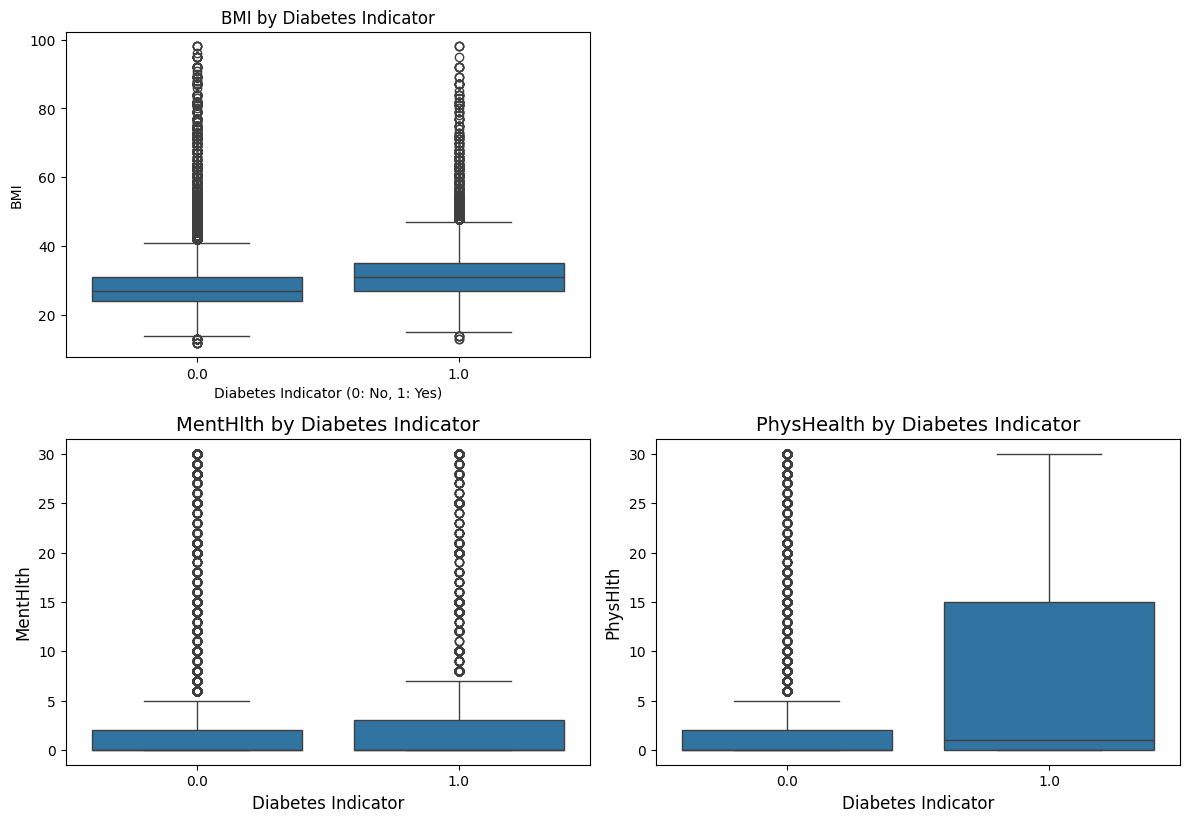

In [ ]:
# Distribution of continuous variables
# Box Plots
plt.figure(figsize=(12, 16)) # Adjusted figure size to accommodate more plots

# Box Plot for BMI
plt.subplot(4, 2, 1) # Create a 4x2 grid of plots and select the 1st subplot
sns.boxplot(data=df, x='Diabetes_binary', y='BMI')
plt.title('BMI by Diabetes Indicator')
plt.xlabel('Diabetes Indicator (0: No, 1: Yes)')
plt.ylabel('BMI')

# Box Plot for MentHlth
plt.subplot(4, 2, 3) # Select the 3rd subplot
sns.boxplot(data=df, x='Diabetes_binary', y='MentHlth')
plt.title('MentHlth by Diabetes Indicator', fontsize=14) # Increase title font size
plt.xlabel('Diabetes Indicator', fontsize=12) # Increase xlabel font size
plt.ylabel('MentHlth', fontsize=12) # Keep ylabel for the first plot

# Box Plot for PhysHlth
plt.subplot(4, 2, 4) # Select the 4th subplot
sns.boxplot(data=df,x='Diabetes_binary', y='PhysHlth')
plt.title('PhysHealth by Diabetes Indicator', fontsize=14) # Increase title font size
plt.xlabel('Diabetes Indicator', fontsize=12) # Increase xlabel font size
plt.ylabel('PhysHlth', fontsize=12) # Leave ylabel empty for the second plot

plt.tight_layout()
plt.show()

In [ ]:
# Correlations
# Select only the continuous variables and the target variable
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cols_for_correlation = ['Diabetes_binary'] + continuous_cols

# Create a copy for correlation calculation and convert target to numeric
df_corr = df[cols_for_correlation].copy()
df_corr['Diabetes_binary'] = pd.to_numeric(df_corr['Diabetes_binary'])


# Create the correlation table
correlation_table = df_corr.corr()

# Display the correlation table with color
print("Correlation Table of Continuous Variables and Target:")
display(correlation_table.style.background_gradient(cmap='coolwarm', axis=None))

Correlation Table of Continuous Variables and Target:


,Diabetes_binary,BMI,MentHlth,PhysHlth
Diabetes_binary,1.000000,0.216843,0.069315,0.171337
BMI,0.216843,1.000000,0.085310,0.121141
MentHlth,0.069315,0.085310,1.000000,0.353619
PhysHlth,0.171337,0.121141,0.353619,1.000000


The box plots and correlation analysis of all continuous variables do not indicate a strong relationship with the target variable (Diabetes_binary); however, we will retain them at this stage for further analysis.

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the number of missing values per column
print("Missing values per column:")
display(missing_values)

Missing values per column:


,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


There is no missing value in the dataset.

In [ ]:
# Check for outliers using a modified IQR method for numerical columns

numerical_cols = ['BMI', 'MentHlth', 'PhysHlth']

print("Outlier detection using modified IQR:")
for col in numerical_cols:
    # calculate interquartile range (IQR) using 10th and 90th percentiles
    q1 = df[col].quantile(0.1)
    q3 = df[col].quantile(0.9)
    iqr = q3 - q1

    # define the boundaries for an outlier with a multiplier of 3
    lower_bound = q1 - (3 * iqr)
    upper_bound = q3 + (3 * iqr)

    # find the outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # display the outliers
    print(f"\nColumn: {col}")
    print(f"  Number of outliers: {len(outliers)}")
    display(outliers[[col]].head()) # Display first few outlier values

Outlier detection using modified IQR:

Column: BMI
  Number of outliers: 347


,BMI
11614,85.0
18415,82.0
19543,79.0
19816,92.0
25574,79.0



Column: MentHlth
  Number of outliers: 0


,MentHlth



Column: PhysHlth
  Number of outliers: 0


,PhysHlth


There are 347 outliers in the BMI columns, we are going to drop all of them.

In [ ]:
# Drop outliers in BMI columns
numerical_cols = ['BMI'] # Only BMI had outliers based on the previous analysis

for col in numerical_cols:
    # calculate interquartile range (IQR) using 10th and 90th percentiles (same as in outlier detection)
    q1 = df[col].quantile(0.1)
    q3 = df[col].quantile(0.9)
    iqr = q3 - q1

    # define the boundaries for an outlier with a multiplier of 3
    lower_bound = q1 - (3 * iqr)
    upper_bound = q3 + (3 * iqr)

    # Drop the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].copy() # Use .copy() to avoid SettingWithCopyWarning

print(f"DataFrame shape after dropping BMI outliers: {df.shape}")

DataFrame shape after dropping BMI outliers: (253333, 22)


Number of potential outliers based on Mahalanobis distance: 0


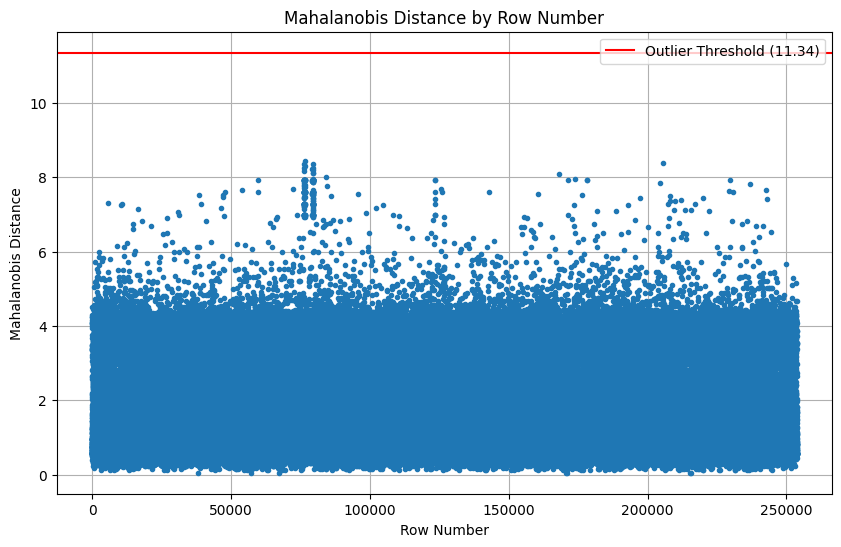

In [ ]:
# Check for outliers using Mahalanobis distance for numerical columns

from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select only the continuous numerical columns
numerical_cols_maha = ['BMI', 'MentHlth', 'PhysHlth']
data_for_maha = df[numerical_cols_maha].copy()

# Standardize the numerical data
scaler_maha = StandardScaler()
data_scaled_maha = scaler_maha.fit_transform(data_for_maha)

# Calculate the covariance matrix of the scaled data
covariance_matrix = np.cov(data_scaled_maha.T)

# Calculate the inverse of the covariance matrix
# Add a small value to the diagonal for numerical stability if needed
try:
    inv_cov = np.linalg.inv(covariance_matrix)
except np.linalg.LinAlgError:
    print("Warning: Singular covariance matrix. Adding a small value to the diagonal for inversion.")
    covariance_matrix += np.eye(covariance_matrix.shape[0]) * 1e-6
    inv_cov = np.linalg.inv(covariance_matrix)


# Calculate Mahalanobis distance for each data point
distances = []
for i in range(data_scaled_maha.shape[0]):
    row = data_scaled_maha[i, :]
    mahalanobis_distance = distance.mahalanobis(row, np.mean(data_scaled_maha, axis=0), inv_cov)
    distances.append(mahalanobis_distance)

# Set a threshold for outlier detection (e.g., based on chi-squared distribution or a chosen percentile)
# Using a common threshold for multivariate outliers based on chi-squared distribution with df = number of features
from scipy.stats import chi2
threshold = chi2.ppf(0.99, data_scaled_maha.shape[1]) # 0.99 confidence level, df = number of features

# Identify outliers
outliers_maha_indices = [i for i, d in enumerate(distances) if d > threshold]

print(f"Number of potential outliers based on Mahalanobis distance: {len(outliers_maha_indices)}")

# Optional: Display some of the outlier data points
# print("\nPotential Outlier Data Points (first 5):")
# display(df.iloc[outliers_maha_indices].head())


# Plot Mahalanobis distances
plt.figure(figsize=(10, 6))
# Use df.index as the x-axis since distances correspond to the original DataFrame rows
plt.plot(df.index, distances, marker='o', linestyle='', markersize=3)
plt.axhline(y=threshold, color='r', linestyle='-', label=f'Outlier Threshold ({threshold:.2f})')
plt.title('Mahalanobis Distance by Row Number')
plt.xlabel('Row Number')
plt.ylabel('Mahalanobis Distance')
plt.legend()
plt.grid(True)
plt.show()

Based on the Mahalanobis distance, no outliers were detected in the dataset.

# Partitioning

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable
target = 'Diabetes_binary'
# Define features by dropping the target variable, it's label version, and the 'CustomerID' column
features = df.drop([target], axis=1)
target_variable = df[target]

# Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.2, random_state=42)

# Split the 80% training data into 60% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (151999, 21) (151999,)
Validation set shape: (50667, 21) (50667,)
Test set shape: (50667, 21) (50667,)


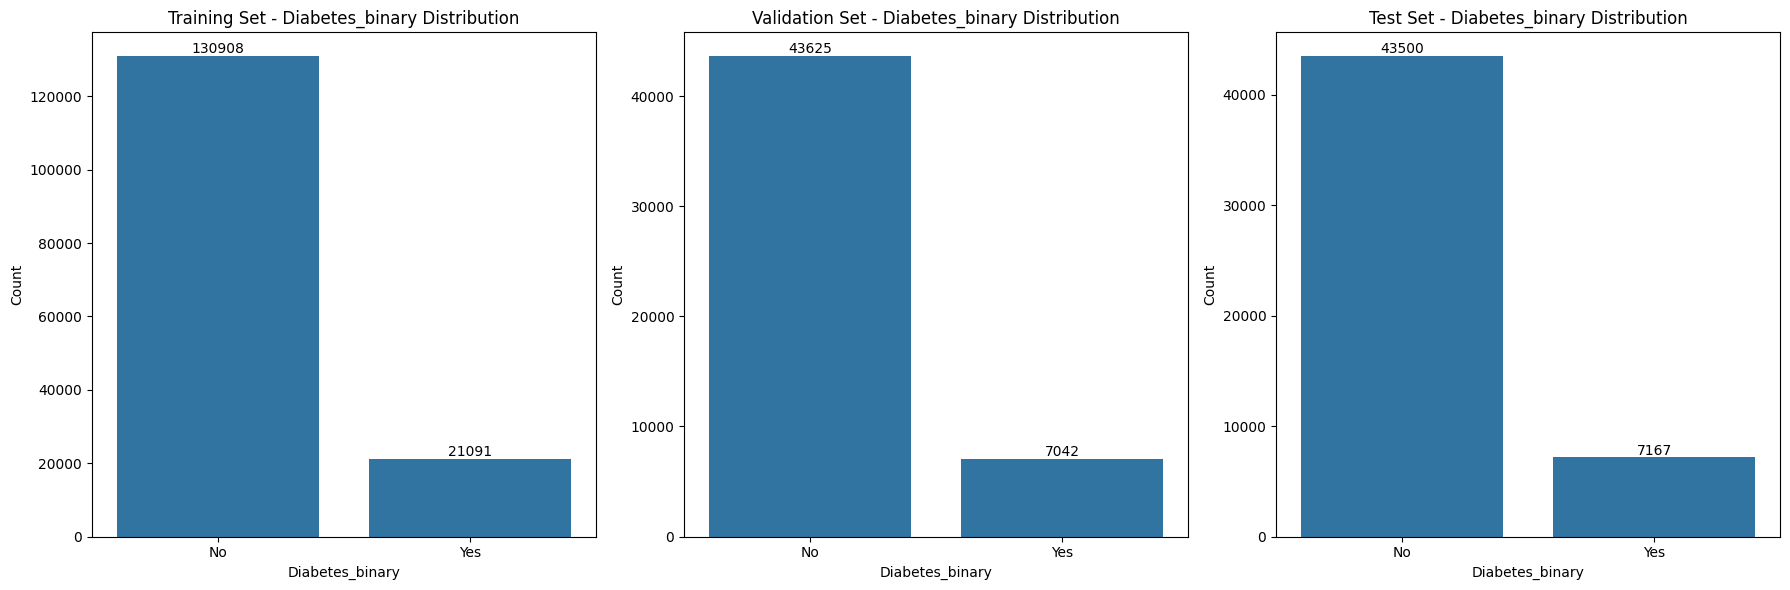

Training set Diabetes_binary counts and percentages:
Diabetes_binary
0.0    130908
1.0     21091
Name: count, dtype: int64
Diabetes_binary
0.0    86.12
1.0    13.88
Name: proportion, dtype: float64

Validation set Diabetes_binary counts and percentages:
Diabetes_binary
0.0    43625
1.0     7042
Name: count, dtype: int64
Diabetes_binary
0.0    86.1
1.0    13.9
Name: proportion, dtype: float64

Test set Diabetes_binary counts and percentages:
Diabetes_binary
0.0    43500
1.0     7167
Name: count, dtype: int64
Diabetes_binary
0.0    85.85
1.0    14.15
Name: proportion, dtype: float64


In [ ]:
# Distribution of Training/Val/Test sets
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the features and target for plotting
train_data = X_train.copy()
train_data['Diabetes_binary'] = y_train

val_data = X_val.copy()
val_data['Diabetes_binary'] = y_val

test_data = X_test.copy()
test_data['Diabetes_binary'] = y_test

# Plot the distribution of 'Diabetes_binary' in each partition
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=train_data, x='Diabetes_binary', ax=axs[0])
axs[0].set_title('Training Set - Diabetes_binary Distribution')
axs[0].set_xlabel('Diabetes_binary')
axs[0].set_ylabel('Count')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['No', 'Yes'])
for p in axs[0].patches:
    axs[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

sns.countplot(data=val_data, x='Diabetes_binary', ax=axs[1])
axs[1].set_title('Validation Set - Diabetes_binary Distribution')
axs[1].set_xlabel('Diabetes_binary')
axs[1].set_ylabel('Count')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['No', 'Yes'])
for p in axs[1].patches:
    axs[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


sns.countplot(data=test_data, x='Diabetes_binary', ax=axs[2])
axs[2].set_title('Test Set - Diabetes_binary Distribution')
axs[2].set_xlabel('Diabetes_binary')
axs[2].set_ylabel('Count')
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['No', 'Yes'])
for p in axs[2].patches:
    axs[2].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Print counts and percentages for each partition
print("Training set Diabetes_binary counts and percentages:")
train_counts = train_data['Diabetes_binary'].value_counts()
train_percentages = train_data['Diabetes_binary'].value_counts(normalize=True) * 100
print(train_counts)
print(train_percentages.round(2)) # Round percentages to 2 decimal places


print("\nValidation set Diabetes_binary counts and percentages:")
val_counts = val_data['Diabetes_binary'].value_counts()
val_percentages = val_data['Diabetes_binary'].value_counts(normalize=True) * 100
print(val_counts)
print(val_percentages.round(2)) # Round percentages to 2 decimal bases


print("\nTest set Diabetes_binary counts and percentages:")
test_counts = test_data['Diabetes_binary'].value_counts()
test_percentages = test_data['Diabetes_binary'].value_counts(normalize=True) * 100
print(test_counts)
print(test_percentages.round(2)) # Round percentages to 2 decimal places

# Logistic Regression Model

## Iteration 1 - All Features

In [ ]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Make predictions (classes) on the training, validation, and test sets
y_train_pred = logistic_model.predict(X_train)
y_val_pred = logistic_model.predict(X_val)
y_test_pred = logistic_model.predict(X_test)

# Get predicted probabilities for the training, validation, and test sets
y_train_proba = logistic_model.predict_proba(X_train)[:, 1] # Probability of the positive class (1)
y_val_proba = logistic_model.predict_proba(X_val)[:, 1]
y_test_proba = logistic_model.predict_proba(X_test)[:, 1]

print("Predictions (classes and probabilities) made successfully on training, validation, and test sets.")

Predictions (classes and probabilities) made successfully on training, validation, and test sets.


###Model Assessment Iteration 1


Confusion Matrix - Training Set:
[[127849   3059]
 [ 17720   3371]]

Confusion Matrix - Validation Set:
[[42622  1003]
 [ 5866  1176]]

Confusion Matrix - Test Set:
[[42465  1035]
 [ 6059  1108]]


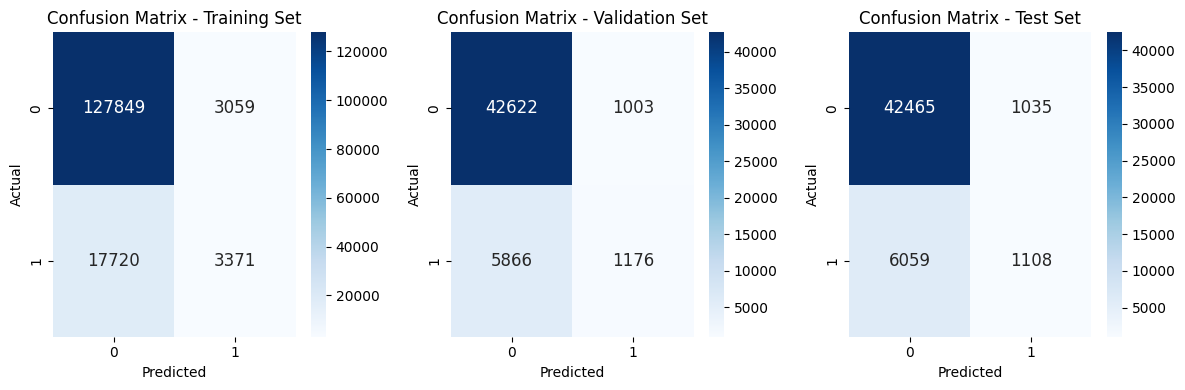

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix - Training Set:")
print(cm_train)

# Calculate confusion matrix for the validation set
cm_val = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix - Validation Set:")
print(cm_val)

# Calculate confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Test Set:")
print(cm_test)

# Optional: Visualize Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0], annot_kws={"size": 12})
axes[0].set_title('Confusion Matrix - Training Set')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=axes[1], annot_kws={"size": 12})
axes[1].set_title('Confusion Matrix - Validation Set')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[2], annot_kws={"size": 12})
axes[2].set_title('Confusion Matrix - Test Set')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# Show the coefficients of the logistic regression model, including the intercept
feature_names = X_train.columns
coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_[0]

# Create a DataFrame for coefficients and feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Add the intercept to the DataFrame
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]})
coef_df = pd.concat([intercept_df, coef_df], ignore_index=True)

print("\nCoefficients (including Intercept) with Feature Names:")
print(coef_df)


Coefficients (including Intercept) with Feature Names:
                 Feature  Coefficient
0              Intercept    -4.419752
1                 HighBP     0.895198
2               HighChol     0.869365
3              CholCheck    -0.767050
4                    BMI     0.054984
5                 Smoker    -0.068045
6                 Stroke     0.181828
7   HeartDiseaseorAttack     0.188902
8           PhysActivity    -0.152389
9                 Fruits    -0.160310
10               Veggies    -0.130815
11     HvyAlcoholConsump    -1.234154
12         AnyHealthcare    -0.522523
13           NoDocbcCost    -0.290837
14               GenHlth     0.474148
15              MentHlth    -0.005557
16              PhysHlth    -0.003786
17              DiffWalk     0.089350
18                   Sex     0.172323
19                   Age     0.099647
20             Education    -0.104422
21                Income    -0.031385


In [ ]:
# Show the regression formula
# The formula for logistic regression is: log(p / (1 - p)) = b0 + b1*x1 + b2*x2 + ... + bn*xn
# Rearranging for p: p = 1 / (1 + exp(-(b0 + b1*x1 + b2*x2 + ... + bn*xn)))

intercept = logistic_model.intercept_[0]

linear_combination = f"{intercept:.4f}"
for i, feature in enumerate(feature_names):
    linear_combination += f" + {coefficients[i]:.4f}*{feature}"

formula = f"p = 1 / (1 + exp(-({linear_combination})))"

print("Logistic Regression Formula (with probability on the left):")
print(formula)

Logistic Regression Formula (with probability on the left):
p = 1 / (1 + exp(-(-4.4198 + 0.8952*HighBP + 0.8694*HighChol + -0.7670*CholCheck + 0.0550*BMI + -0.0680*Smoker + 0.1818*Stroke + 0.1889*HeartDiseaseorAttack + -0.1524*PhysActivity + -0.1603*Fruits + -0.1308*Veggies + -1.2342*HvyAlcoholConsump + -0.5225*AnyHealthcare + -0.2908*NoDocbcCost + 0.4741*GenHlth + -0.0056*MentHlth + -0.0038*PhysHlth + 0.0894*DiffWalk + 0.1723*Sex + 0.0996*Age + -0.1044*Education + -0.0314*Income)))


In [ ]:
from sklearn.metrics import classification_report

# Show classification report for the training set
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred))

# Show classification report for the validation set
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, y_val_pred))

# Show classification report for the test set
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred))

Classification Report - Training Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92    130908
         1.0       0.52      0.16      0.24     21091

    accuracy                           0.86    151999
   macro avg       0.70      0.57      0.58    151999
weighted avg       0.83      0.86      0.83    151999


Classification Report - Validation Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43625
         1.0       0.54      0.17      0.26      7042

    accuracy                           0.86     50667
   macro avg       0.71      0.57      0.59     50667
weighted avg       0.83      0.86      0.83     50667


Classification Report - Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     43500
         1.0       0.52      0.15      0.24      7167

    accuracy                           0.86     50667
   macro avg  

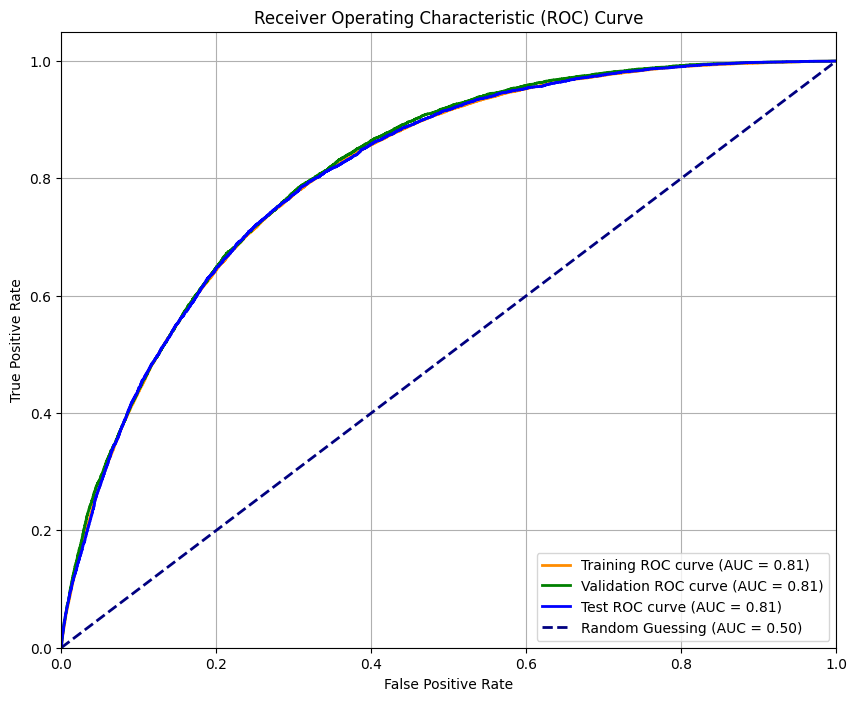

Training AUC: 0.8106
Validation AUC: 0.8145
Test AUC: 0.8113


In [ ]:
# Calculate ROC curve and AUC for the training set
# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train_numeric, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for the validation set
fpr_val, tpr_val, thresholds_val = roc_curve(y_val_numeric, y_val_proba)
roc_auc_val = auc(fpr_val, tpr_val)

# Calculate ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_numeric, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (AUC = %0.2f)' % roc_auc_val)
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.50)') # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Training AUC: {roc_auc_train:.4f}")
print(f"Validation AUC: {roc_auc_val:.4f}")
print(f"Test AUC: {roc_auc_test:.4f}")

In [ ]:
# Convert relevant columns to numeric for statsmodels
X_train_sm = X_train.copy()
for col in X_train_sm.columns:
    # Attempt to convert columns to numeric, coercing errors to NaN
    X_train_sm[col] = pd.to_numeric(X_train_sm[col], errors='coerce')

# Drop any columns that could not be converted to numeric (if any)
X_train_sm = X_train_sm.dropna(axis=1)

# Add a constant (intercept) to the features for statsmodels
X_train_sm = sm.add_constant(X_train_sm)

# Fit the logistic regression model using statsmodels
# Convert y_train to numeric as well, as statsmodels expects numeric target
y_train_numeric_sm = pd.to_numeric(y_train, errors='coerce')

# Drop rows where y_train became NaN due to coercion errors
X_train_sm = X_train_sm[y_train_numeric_sm.notna()]
y_train_numeric_sm = y_train_numeric_sm.dropna()

logit_model = sm.Logit(y_train_numeric_sm, X_train_sm)
result = logit_model.fit()

# Show the model summary, which includes p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.318480
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               151999
Model:                          Logit   Df Residuals:                   151977
Method:                           MLE   Df Model:                           21
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.2091
Time:                        00:29:19   Log-Likelihood:                -48409.
converged:                       True   LL-Null:                       -61210.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.0143      0.121    -66.119      0.000      -8.252      -7.777

From the p-value table, we identified variables with p-values < 0.05 and used them to tune the model to reduce noise and improve stability.

##Iteration 2 - Tuning (selected features)

In [ ]:
# statistically significant features
selected_features = ['HighBP', 'HighChol','CholCheck','BMI','Stroke','HeartDiseaseorAttack','PhysActivity','Education',
                     'Veggies','HvyAlcoholConsump','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Income']

# Use the updated train/validation/test splits after outlier removal
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
# Initialize and train the Logistic Regression model with selected features
model_selected = LogisticRegression(random_state=42)
model_selected.fit(X_train_selected, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Make predictions on the training, validation, and test sets with selected features
y_train_pred_selected = model_selected.predict(X_train_selected)
y_val_pred_selected = model_selected.predict(X_val_selected)
y_test_pred_selected = model_selected.predict(X_test_selected)

# Get predicted probabilities for the training, validation, and test sets with selected features
y_train_proba_selected = model_selected.predict_proba(X_train_selected)[:, 1] # Probability of the positive class (1)
y_val_proba_selected = model_selected.predict_proba(X_val_selected)[:, 1]
y_test_proba_selected = model_selected.predict_proba(X_test_selected)[:, 1]

print("Predictions (classes and probabilities) made successfully on training, validation, and test sets with selected features.")

Predictions (classes and probabilities) made successfully on training, validation, and test sets with selected features.


###Model Assessment Iteration 2

Confusion Matrix - Training Set:
[[128278   2630]
 [ 18197   2894]]

Confusion Matrix - Validation Set:
[[42796   829]
 [ 6019  1023]]

Confusion Matrix - Test Set:
[[42620   880]
 [ 6222   945]]


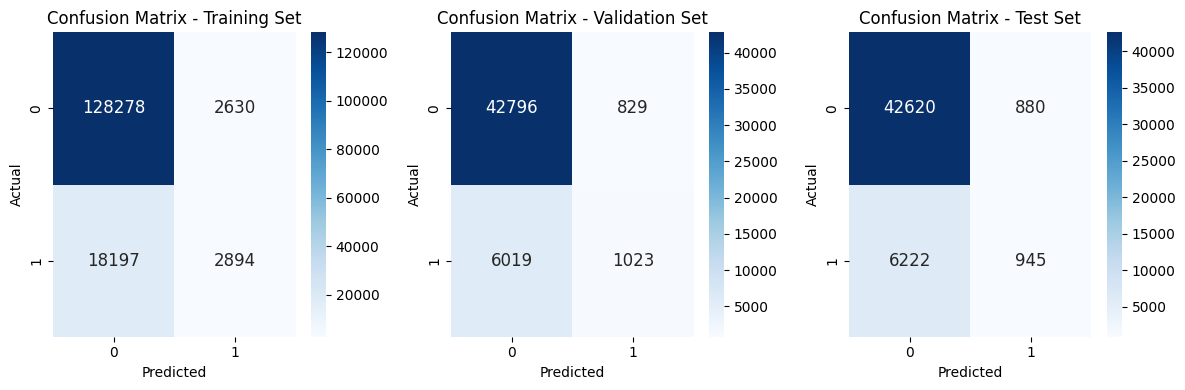

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_train_pred_selected)
print("Confusion Matrix - Training Set:")
print(cm_train)

# Calculate confusion matrix for the validation set
cm_val = confusion_matrix(y_val, y_val_pred_selected)
print("\nConfusion Matrix - Validation Set:")
print(cm_val)

# Calculate confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred_selected)
print("\nConfusion Matrix - Test Set:")
print(cm_test)

# Optional: Visualize Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0], annot_kws={"size": 12})
axes[0].set_title('Confusion Matrix - Training Set')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=axes[1], annot_kws={"size": 12})
axes[1].set_title('Confusion Matrix - Validation Set')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[2], annot_kws={"size": 12})
axes[2].set_title('Confusion Matrix - Test Set')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Show classification report for the training set
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred_selected))

# Show classification report for the validation set
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, y_val_pred_selected))

# Show classification report for the test set
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred_selected))

Classification Report - Training Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92    130908
         1.0       0.52      0.14      0.22     21091

    accuracy                           0.86    151999
   macro avg       0.70      0.56      0.57    151999
weighted avg       0.83      0.86      0.83    151999


Classification Report - Validation Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43625
         1.0       0.55      0.15      0.23      7042

    accuracy                           0.86     50667
   macro avg       0.71      0.56      0.58     50667
weighted avg       0.83      0.86      0.83     50667


Classification Report - Test Set:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43500
         1.0       0.52      0.13      0.21      7167

    accuracy                           0.86     50667
   macro avg  

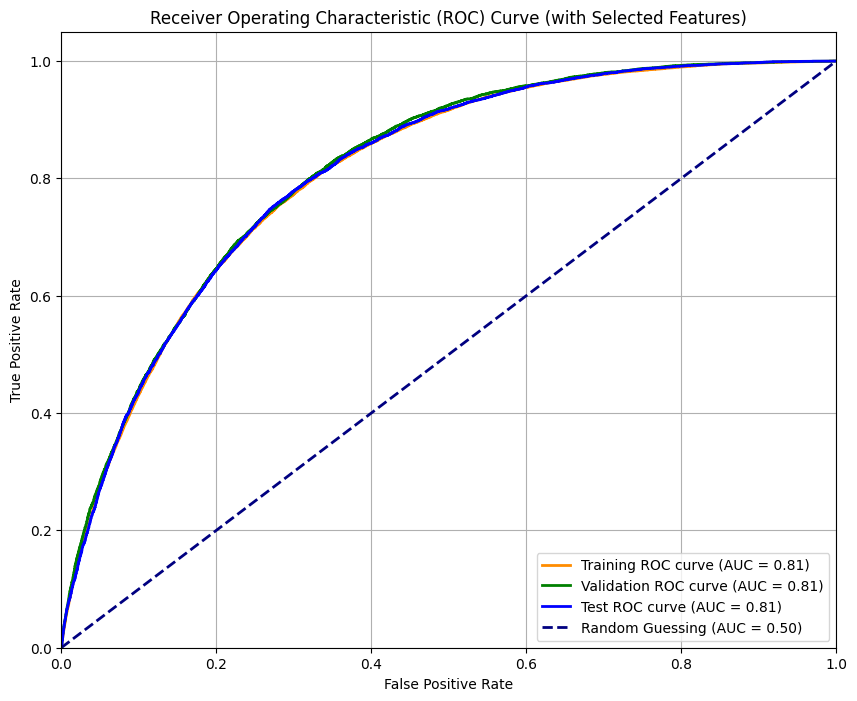

Training AUC (with selected features): 0.8107
Validation AUC (with selected features): 0.8149
Test AUC (with selected features): 0.8120


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

# Calculate ROC curve and AUC for the training set with selected features
fpr_train_selected, tpr_train_selected, thresholds_train_selected = roc_curve(y_train_numeric, y_train_proba_selected)
roc_auc_train_selected = auc(fpr_train_selected, tpr_train_selected)

# Calculate ROC curve and AUC for the validation set with selected features
fpr_val_selected, tpr_val_selected, thresholds_val_selected = roc_curve(y_val_numeric, y_val_proba_selected)
roc_auc_val_selected = auc(fpr_val_selected, tpr_val_selected)

# Calculate ROC curve and AUC for the test set with selected features
fpr_test_selected, tpr_test_selected, thresholds_test_selected = roc_curve(y_test_numeric, y_test_proba_selected)
roc_auc_test_selected = auc(fpr_test_selected, tpr_test_selected)

# Plot ROC curves with selected features
plt.figure(figsize=(10, 8))
plt.plot(fpr_train_selected, tpr_train_selected, color='darkorange', lw=2, label='Training ROC curve (AUC = %0.2f)' % roc_auc_train_selected)
plt.plot(fpr_val_selected, tpr_val_selected, color='green', lw=2, label='Validation ROC curve (AUC = %0.2f)' % roc_auc_val_selected)
plt.plot(fpr_test_selected, tpr_test_selected, color='blue', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test_selected)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.50)') # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (with Selected Features)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Training AUC (with selected features): {roc_auc_train_selected:.4f}")
print(f"Validation AUC (with selected features): {roc_auc_val_selected:.4f}")
print(f"Test AUC (with selected features): {roc_auc_test_selected:.4f}")

In [ ]:
# Convert relevant columns to numeric for statsmodels
X_train_selected_sm = X_train_selected.copy()
for col in X_train_selected_sm.columns:
    # Attempt to convert columns to numeric, coercing errors to NaN
    X_train_selected_sm[col] = pd.to_numeric(X_train_selected_sm[col], errors='coerce')

# Drop any columns that could not be converted to numeric (if any)
X_train_selected_sm = X_train_selected_sm.dropna(axis=1)

# Add a constant (intercept) to the features for statsmodels
X_train_selected_sm = sm.add_constant(X_train_selected_sm)

# Fit the logistic regression model using statsmodels
# Convert y_train to numeric as well, as statsmodels expects numeric target
y_train_numeric_sm = pd.to_numeric(y_train, errors='coerce')

# Drop rows where y_train became NaN due to coercion errors
X_train_selected_sm = X_train_selected_sm[y_train_numeric_sm.notna()]
y_train_numeric_sm = y_train_numeric_sm.dropna()


logit_model_selected = sm.Logit(y_train_numeric_sm, X_train_selected_sm)
result_selected = logit_model_selected.fit()

# Show the model summary, which includes p-values
print(result_selected.summary())

Optimization terminated successfully.
         Current function value: 0.318491
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               151999
Model:                          Logit   Df Residuals:                   151980
Method:                           MLE   Df Model:                           18
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.2091
Time:                        00:29:38   Log-Likelihood:                -48410.
converged:                       True   LL-Null:                       -61210.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.9959      0.117    -68.111      0.000      -8.226      -7.766

We introduced an interaction term to capture potential combined effects between DiffWalk and Age and to test whether it could improve the model’s performance.

##Iteration 3 - Tuning (interaction features)

In [ ]:
# Create the interaction term between DiffWalk and Age off of the statistically significant columns df
X_train_interact = X_train_selected.copy()
X_val_interact = X_val_selected.copy()
X_test_interact = X_test_selected.copy()

# Convert 'DiffWalk' and 'Age' to numeric before creating the interaction term
X_train_interact['DiffWalk'] = pd.to_numeric(X_train_interact['DiffWalk'])
X_train_interact['Age'] = pd.to_numeric(X_train_interact['Age'])
X_val_interact['DiffWalk'] = pd.to_numeric(X_val_interact['DiffWalk'])
X_val_interact['Age'] = pd.to_numeric(X_val_interact['Age'])
X_test_interact['DiffWalk'] = pd.to_numeric(X_test_interact['DiffWalk'])
X_test_interact['Age'] = pd.to_numeric(X_test_interact['Age'])

X_train_interact['DiffWalk_Age_Interaction'] = X_train_interact['DiffWalk'] * X_train_interact['Age']
X_val_interact['DiffWalk_Age_Interaction'] = X_val_interact['DiffWalk'] * X_val_interact['Age']
X_test_interact['DiffWalk_Age_Interaction'] = X_test_interact['DiffWalk'] * X_test_interact['Age']

# Initialize and train the Logistic Regression model with the interaction term
logistic_model_interact = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter to address potential convergence issues
logistic_model_interact.fit(X_train_interact, y_train)

print("Logistic Regression model with DiffWalk and Age interaction term trained successfully.")

# Make predictions with the new model
y_train_pred_interact = logistic_model_interact.predict(X_train_interact)
y_val_pred_interact = logistic_model_interact.predict(X_val_interact)
y_test_pred_interact = logistic_model_interact.predict(X_test_interact)

# Get predicted probabilities with the new model
y_train_proba_interact = logistic_model_interact.predict_proba(X_train_interact)[:, 1]
y_val_proba_interact = logistic_model_interact.predict_proba(X_val_interact)[:, 1]
y_test_proba_interact = logistic_model_interact.predict_proba(X_test_interact)[:, 1]

print("Predictions with interaction term made successfully.")

Logistic Regression model with DiffWalk and Age interaction term trained successfully.
Predictions with interaction term made successfully.


Difficulty in walking or climbing up stairs may mean extremely different things depending on the age buckets. If someone is very old, even if they are healthy they may have a hard time walking up stairs, while if someone is young and has a hard time walking up stairs there are very different implications.

### Model Assessment Iteration 3

Confusion Matrix - Training Set:
[[128125   2783]
 [ 17767   3324]]

Confusion Matrix - Validation Set:
[[42782   843]
 [ 5899  1143]]

Confusion Matrix - Test Set:
[[42611   889]
 [ 6095  1072]]


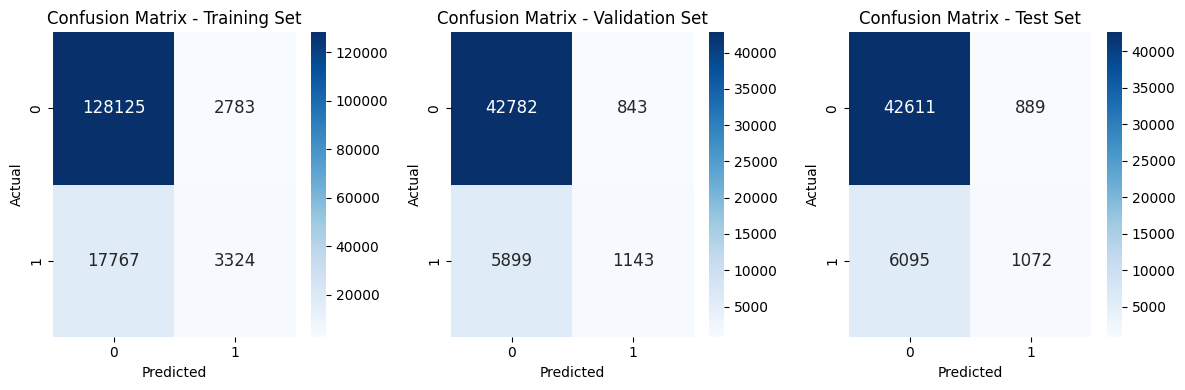

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_train_pred_interact)
print("Confusion Matrix - Training Set:")
print(cm_train)

# Calculate confusion matrix for the validation set
cm_val = confusion_matrix(y_val, y_val_pred_interact)
print("\nConfusion Matrix - Validation Set:")
print(cm_val)

# Calculate confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred_interact)
print("\nConfusion Matrix - Test Set:")
print(cm_test)

# Optional: Visualize Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0], annot_kws={"size": 12})
axes[0].set_title('Confusion Matrix - Training Set')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=axes[1], annot_kws={"size": 12})
axes[1].set_title('Confusion Matrix - Validation Set')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[2], annot_kws={"size": 12})
axes[2].set_title('Confusion Matrix - Test Set')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# Show classification report for the training set with interaction term
print("Classification Report - Training Set (with Interaction Term):")
print(classification_report(y_train, y_train_pred_interact))

# Show classification report for the validation set with interaction term
print("\nClassification Report - Validation Set (with Interaction Term):")
print(classification_report(y_val, y_val_pred_interact))

# Show classification report for the test set with interaction term
print("\nClassification Report - Test Set (with Interaction Term):")
print(classification_report(y_test, y_test_pred_interact))

Classification Report - Training Set (with Interaction Term):
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    130908
         1.0       0.54      0.16      0.24     21091

    accuracy                           0.86    151999
   macro avg       0.71      0.57      0.59    151999
weighted avg       0.83      0.86      0.83    151999


Classification Report - Validation Set (with Interaction Term):
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43625
         1.0       0.58      0.16      0.25      7042

    accuracy                           0.87     50667
   macro avg       0.73      0.57      0.59     50667
weighted avg       0.84      0.87      0.83     50667


Classification Report - Test Set (with Interaction Term):
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43500
         1.0       0.55      0.15      0.23      71

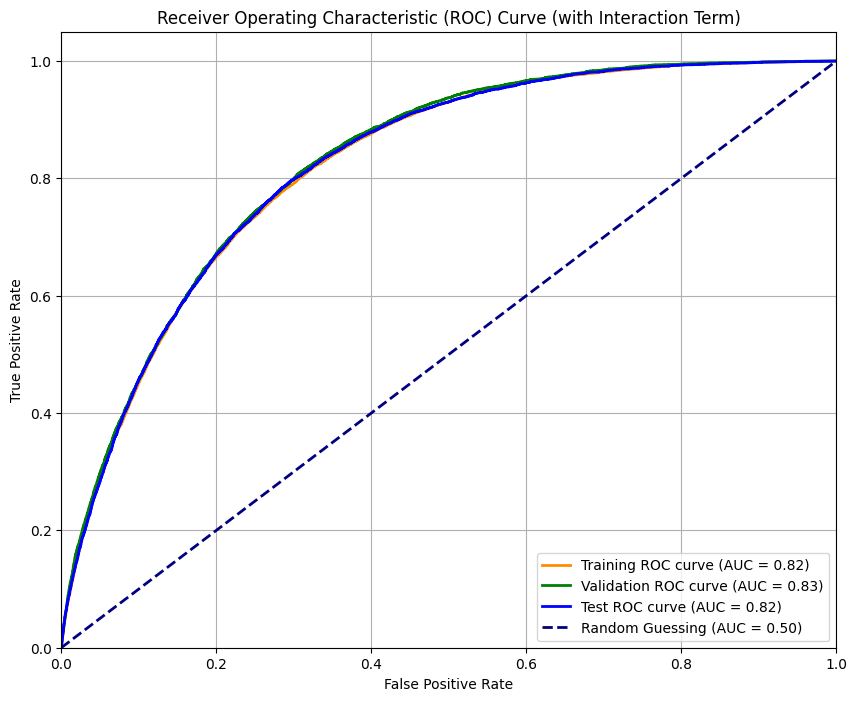

Training AUC (with Interaction Term): 0.8222
Validation AUC (with Interaction Term): 0.8267
Test AUC (with Interaction Term): 0.8233


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

# Calculate ROC curve and AUC for the training set with interaction term
fpr_train_interact, tpr_train_interact, thresholds_train_interact = roc_curve(y_train_numeric, y_train_proba_interact)
roc_auc_train_interact = auc(fpr_train_interact, tpr_train_interact)

# Calculate ROC curve and AUC for the validation set with interaction term
fpr_val_interact, tpr_val_interact, thresholds_val_interact = roc_curve(y_val_numeric, y_val_proba_interact)
roc_auc_val_interact = auc(fpr_val_interact, tpr_val_interact)

# Calculate ROC curve and AUC for the test set with interaction term
fpr_test_interact, tpr_test_interact, thresholds_test_interact = roc_curve(y_test_numeric, y_test_proba_interact)
roc_auc_test_interact = auc(fpr_test_interact, tpr_test_interact)

# Plot ROC curves with interaction term
plt.figure(figsize=(10, 8))
plt.plot(fpr_train_interact, tpr_train_interact, color='darkorange', lw=2, label='Training ROC curve (AUC = %0.2f)' % roc_auc_train_interact)
plt.plot(fpr_val_interact, tpr_val_interact, color='green', lw=2, label='Validation ROC curve (AUC = %0.2f)' % roc_auc_val_interact)
plt.plot(fpr_test_interact, tpr_test_interact, color='blue', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test_interact)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.50)') # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (with Interaction Term)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Training AUC (with Interaction Term): {roc_auc_train_interact:.4f}")
print(f"Validation AUC (with Interaction Term): {roc_auc_val_interact:.4f}")
print(f"Test AUC (with Interaction Term): {roc_auc_test_interact:.4f}")

In [ ]:
# Convert relevant columns to numeric for statsmodels
X_train_interact_sm = X_train_interact.copy()
for col in X_train_interact_sm.columns:
    # Attempt to convert columns to numeric, coercing errors to NaN
    X_train_interact_sm[col] = pd.to_numeric(X_train_interact_sm[col], errors='coerce')

# Drop any columns that could not be converted to numeric (if any)
X_train_interact_sm = X_train_interact_sm.dropna(axis=1)

# Add a constant (intercept) to the features for statsmodels
X_train_interact_sm = sm.add_constant(X_train_interact_sm)

# Fit the logistic regression model using statsmodels
# Convert y_train to numeric as well, as statsmodels expects numeric target
y_train_numeric_sm = pd.to_numeric(y_train, errors='coerce')

# Drop rows where y_train became NaN due to coercion errors
X_train_interact_sm = X_train_interact_sm[y_train_numeric_sm.notna()]
y_train_numeric_sm = y_train_numeric_sm.dropna()


logit_model_interact = sm.Logit(y_train_numeric_sm, X_train_interact_sm)
result_interact = logit_model_interact.fit()

# Show the model summary, which includes p-values
print(result_interact.summary())

Optimization terminated successfully.
         Current function value: 0.318256
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               151999
Model:                          Logit   Df Residuals:                   151979
Method:                           MLE   Df Model:                           19
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.2097
Time:                        00:30:10   Log-Likelihood:                -48375.
converged:                       True   LL-Null:                       -61210.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.1079      0.118    -68.462      0.000      -8.340

Since the p-value for the 'NoDocbcCost' variable is 0.130, which is greater than the significance level of 0.05, this variable is not statistically significant and will be removed from the dataset.

We used oversampling on the model with selected features to correct the class imbalance and improve prediction of the minority class.

##Iteration 4 - Oversampling and Selected Features

In [ ]:
# Start with the feature sets from Iteration 3, which include the interaction term
X_train_iter4 = X_train_interact.copy()
X_val_iter4 = X_val_interact.copy()
X_test_iter4 = X_test_interact.copy()

# Define the feature to remove for Iteration 4
feature_to_remove_iter4 = 'NoDocbcCost'

# Remove 'NoDocbcCost' if it exists in the feature sets
if feature_to_remove_iter4 in X_train_iter4.columns:
    X_train_iter4 = X_train_iter4.drop(columns=[feature_to_remove_iter4])
if feature_to_remove_iter4 in X_val_iter4.columns:
    X_val_iter4 = X_val_iter4.drop(columns=[feature_to_remove_iter4])
if feature_to_remove_iter4 in X_test_iter4.columns:
    X_test_iter4 = X_test_iter4.drop(columns=[feature_to_remove_iter4])

# Update the list of selected features for this iteration based on the columns actually present
selected_features_iter4 = X_train_iter4.columns.tolist()

print("New feature sets created successfully for Iteration 4.")
print(f"Features for Iteration 4: {selected_features_iter4}")
print(f"X_train_iter4 shape: {X_train_iter4.shape}")
print(f"X_val_iter4 shape: {X_val_iter4.shape}")
print(f"X_test_iter4 shape: {X_test_iter4.shape}")

New feature sets created successfully.
Final selected features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Education', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'DiffWalk_Age_Interaction']
X_train_iter4 shape: (151999, 18)
X_val_iter4 shape: (50667, 18)
X_test_iter4 shape: (50667, 18)


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_iter4, y_train)

# Print the shape of the original and oversampled target variables
print("Original y_train shape:", y_train.shape)
print("Oversampled y_train_oversampled shape:", y_train_oversampled.shape)
print("Class distribution after SMOTE:\n", y_train_oversampled.value_counts())

Original y_train shape: (151999,)
Oversampled y_train_oversampled shape: (261816,)
Class distribution after SMOTE:
 Diabetes_binary
0.0    130908
1.0    130908
Name: count, dtype: int64


In [ ]:
logistic_model_resampled = LogisticRegression(random_state=42, max_iter=1000)
logistic_model_resampled.fit(X_train_oversampled, y_train_oversampled)

print("Logistic Regression model trained successfully with oversampled data.")

Logistic Regression model trained successfully with oversampled data.


###Model Assessment Iteration 4

Predictions (classes and probabilities) made successfully on oversampled training, validation, and test sets.

Confusion Matrix - Oversampled Training Set:
[[ 94980  35928]
 [ 28230 102678]]

Confusion Matrix - Validation Set:
[[31783 11842]
 [ 1669  5373]]

Confusion Matrix - Test Set:
[[31685 11815]
 [ 1677  5490]]


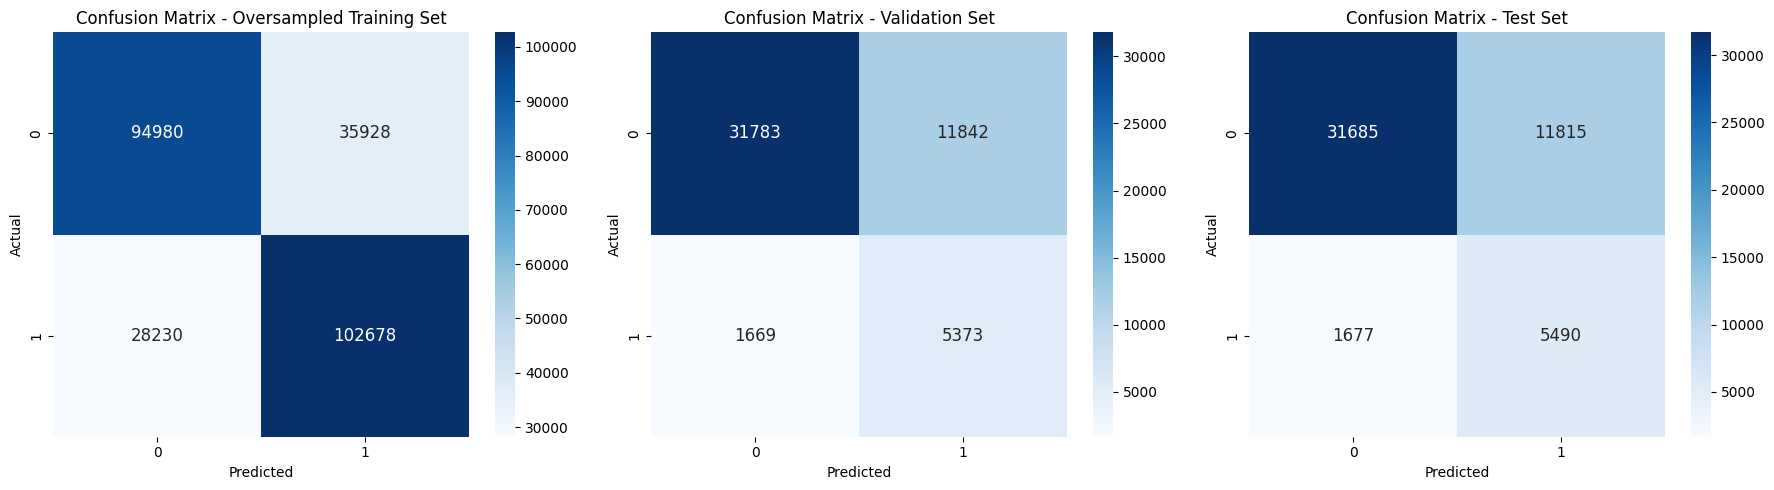


Classification Report - Oversampled Training Set:
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75    130908
         1.0       0.74      0.78      0.76    130908

    accuracy                           0.75    261816
   macro avg       0.76      0.75      0.75    261816
weighted avg       0.76      0.75      0.75    261816


Classification Report - Validation Set:
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82     43625
         1.0       0.31      0.76      0.44      7042

    accuracy                           0.73     50667
   macro avg       0.63      0.75      0.63     50667
weighted avg       0.86      0.73      0.77     50667


Classification Report - Test Set:
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82     43500
         1.0       0.32      0.77      0.45      7167

    accuracy                           0.73     50667
 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Make predictions (classes) on the oversampled training, validation, and test sets
y_train_pred_oversampled = logistic_model_resampled.predict(X_train_oversampled)
y_val_pred_oversampled = logistic_model_resampled.predict(X_val_iter4)
y_test_pred_oversampled = logistic_model_resampled.predict(X_test_iter4)

# Convert predictions to numeric type for consistent comparison with y_true
y_train_pred_oversampled_numeric = pd.to_numeric(y_train_pred_oversampled)
y_val_pred_oversampled_numeric = pd.to_numeric(y_val_pred_oversampled)
y_test_pred_oversampled_numeric = pd.to_numeric(y_test_pred_oversampled)

# Get predicted probabilities for the oversampled training, validation, and test sets
y_train_proba_oversampled = logistic_model_resampled.predict_proba(X_train_oversampled)[:, 1]
y_val_proba_oversampled = logistic_model_resampled.predict_proba(X_val_iter4)[:, 1]
y_test_proba_oversampled = logistic_model_resampled.predict_proba(X_test_iter4)[:, 1]

print("Predictions (classes and probabilities) made successfully on oversampled training, validation, and test sets.")

# Confusion Matrices
# Convert y_train_oversampled to numeric for confusion_matrix
y_train_oversampled_numeric = pd.to_numeric(y_train_oversampled)

cm_train_oversampled = confusion_matrix(y_train_oversampled_numeric, y_train_pred_oversampled_numeric)
print("\nConfusion Matrix - Oversampled Training Set:")
print(cm_train_oversampled)

cm_val_oversampled = confusion_matrix(y_val_numeric, y_val_pred_oversampled_numeric)
print("\nConfusion Matrix - Validation Set:")
print(cm_val_oversampled)

cm_test_oversampled = confusion_matrix(y_test_numeric, y_test_pred_oversampled_numeric)
print("\nConfusion Matrix - Test Set:")
print(cm_test_oversampled)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(cm_train_oversampled, annot=True, fmt='d', cmap='Blues', ax=axes[0], annot_kws={"size": 12})
axes[0].set_title('Confusion Matrix - Oversampled Training Set')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_val_oversampled, annot=True, fmt='d', cmap='Blues', ax=axes[1], annot_kws={"size": 12})
axes[1].set_title('Confusion Matrix - Validation Set')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_test_oversampled, annot=True, fmt='d', cmap='Blues', ax=axes[2], annot_kws={"size": 12})
axes[2].set_title('Confusion Matrix - Test Set')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
plt.tight_layout()
plt.show()

# Classification Reports
print("\nClassification Report - Oversampled Training Set:")
print(classification_report(y_train_oversampled_numeric, y_train_pred_oversampled_numeric))

print("\nClassification Report - Validation Set:")
print(classification_report(y_val_numeric, y_val_pred_oversampled_numeric))

print("\nClassification Report - Test Set:")
print(classification_report(y_test_numeric, y_test_pred_oversampled_numeric))




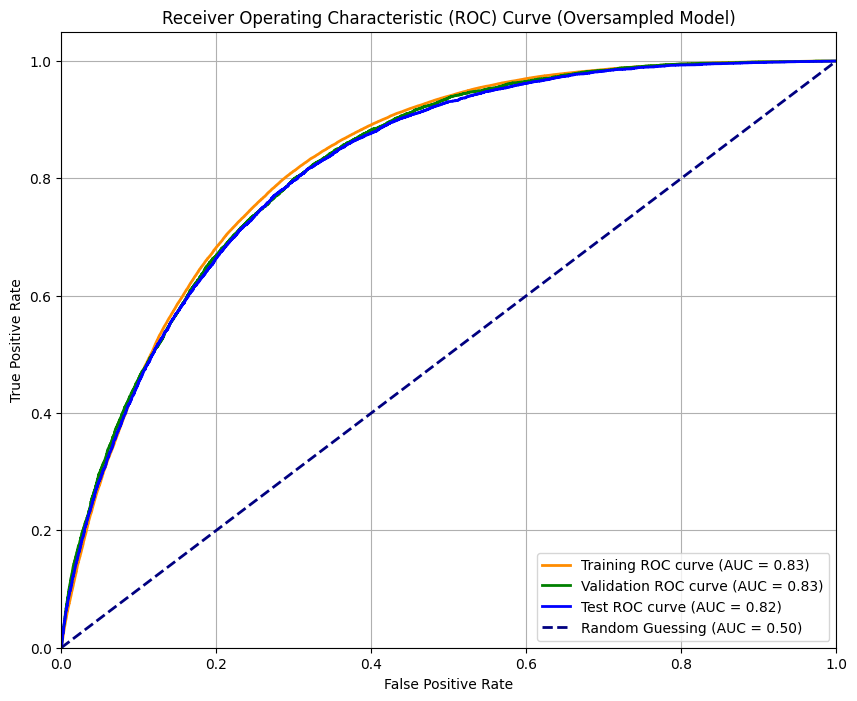

Training AUC (Oversampled Model): 0.8291
Validation AUC (Oversampled Model): 0.8255
Test AUC (Oversampled Model): 0.8223


In [ ]:
# ROC Curves and AUC Scores
fpr_train_oversampled, tpr_train_oversampled, _ = roc_curve(y_train_oversampled_numeric, y_train_proba_oversampled)
roc_auc_train_oversampled = auc(fpr_train_oversampled, tpr_train_oversampled)

fpr_val_oversampled, tpr_val_oversampled, _ = roc_curve(y_val_numeric, y_val_proba_oversampled)
roc_auc_val_oversampled = auc(fpr_val_oversampled, tpr_val_oversampled)

fpr_test_oversampled, tpr_test_oversampled, _ = roc_curve(y_test_numeric, y_test_proba_oversampled)
roc_auc_test_oversampled = auc(fpr_test_oversampled, tpr_test_oversampled)

plt.figure(figsize=(10, 8))
plt.plot(fpr_train_oversampled, tpr_train_oversampled, color='darkorange', lw=2, label='Training ROC curve (AUC = %0.2f)' % roc_auc_train_oversampled)
plt.plot(fpr_val_oversampled, tpr_val_oversampled, color='green', lw=2, label='Validation ROC curve (AUC = %0.2f)' % roc_auc_val_oversampled)
plt.plot(fpr_test_oversampled, tpr_test_oversampled, color='blue', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test_oversampled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Oversampled Model)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Training AUC (Oversampled Model): {roc_auc_train_oversampled:.4f}")
print(f"Validation AUC (Oversampled Model): {roc_auc_val_oversampled:.4f}")
print(f"Test AUC (Oversampled Model): {roc_auc_test_oversampled:.4f}")


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Convert relevant columns to numeric for statsmodels
X_train_oversampled_sm = X_train_oversampled.copy()
for col in X_train_oversampled_sm.columns:
    X_train_oversampled_sm[col] = pd.to_numeric(X_train_oversampled_sm[col], errors='coerce')
X_train_oversampled_sm = X_train_oversampled_sm.dropna(axis=1)
X_train_oversampled_sm = sm.add_constant(X_train_oversampled_sm)
y_train_oversampled_numeric_sm = pd.to_numeric(y_train_oversampled, errors='coerce')
X_train_oversampled_sm = X_train_oversampled_sm[y_train_oversampled_numeric_sm.notna()]
y_train_oversampled_numeric_sm = y_train_oversampled_numeric_sm.dropna()

logit_model_oversampled = sm.Logit(y_train_oversampled_numeric_sm, X_train_oversampled_sm)
result_oversampled = logit_model_oversampled.fit()

print("\nStatsmodels Summary (Oversampled Model):")
print(result_oversampled.summary())

Optimization terminated successfully.
         Current function value: 0.504759
         Iterations 7

Statsmodels Summary (Oversampled Model):
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               261816
Model:                          Logit   Df Residuals:                   261797
Method:                           MLE   Df Model:                           18
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.2718
Time:                        01:17:11   Log-Likelihood:            -1.3215e+05
converged:                       True   LL-Null:                   -1.8148e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -7.5803   

All key variables shown are statistically significant.

Reviewing the Model Performance Metrics of all interations, the Oversampled Logistic Regression Model exibited the highest overall performance. Nonetheless, we noted a trade-off: precision decreased moderately while recall improved significantly.

# Decision Tree Model

## Iteration 1 - All Features

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
# We can start with default parameters or set some like max_depth for initial exploration
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


In [ ]:
# The number of splits in a decision tree is the number of internal nodes.
# This is equal to the total number of nodes minus the number of leaf nodes.
# We can access the tree structure from the tuned_dt_model.tree_ attribute.

tree_ = dt_model.tree_
total_nodes = tree_.node_count
leaf_nodes = tree_.n_leaves

number_of_splits = total_nodes - leaf_nodes

print(f"The decision tree has {number_of_splits} splits (internal nodes).")
print(f"The decision tree has {leaf_nodes} leaves.")

The decision tree has 27886 splits (internal nodes).
The decision tree has 27887 leaves.


### Model Assessment Iteration 1

In [ ]:
from sklearn.metrics import confusion_matrix

# Predictions on training set
y_train_pred_dt = dt_model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred_dt)

# Predictions on validation set
y_val_pred_dt = dt_model.predict(X_val)
cm_val = confusion_matrix(y_val, y_val_pred_dt)

# Predictions on test set
y_test_pred_dt = dt_model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred_dt)

print("Confusion Matrix - Training Set:")
print(cm_train)

print("\nConfusion Matrix - Validation Set:")
print(cm_val)

print("\nConfusion Matrix - Test Set:")
print(cm_test)

Confusion Matrix - Training Set:
[[130889     19]
 [   663  20428]]

Confusion Matrix - Validation Set:
[[38128  5497]
 [ 4747  2295]]

Confusion Matrix - Test Set:
[[38038  5462]
 [ 4833  2334]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

# Convert predicted values to numeric type
y_train_pred_numeric_dt = pd.to_numeric(y_train_pred_dt)
y_val_pred_numeric_dt = pd.to_numeric(y_val_pred_dt)
y_test_pred_numeric_dt = pd.to_numeric(y_test_pred_dt)


# Calculate metrics for Training Set
accuracy_train = accuracy_score(y_train_numeric, y_train_pred_numeric_dt)
precision_train = precision_score(y_train_numeric, y_train_pred_numeric_dt)
recall_train = recall_score(y_train_numeric, y_train_pred_numeric_dt)
f1_train = f1_score(y_train_numeric, y_train_pred_numeric_dt)

print("Training Set Metrics:")
print(f"  Accuracy: {accuracy_train:.4f}")
print(f"  Precision: {precision_train:.4f}")
print(f"  Recall: {recall_train:.4f}")
print(f"  F1-Score: {f1_train:.4f}")

# Calculate metrics for Validation Set
accuracy_val = accuracy_score(y_val_numeric, y_val_pred_numeric_dt)
precision_val = precision_score(y_val_numeric, y_val_pred_numeric_dt)
recall_val = recall_score(y_val_numeric, y_val_pred_numeric_dt)
f1_val = f1_score(y_val_numeric, y_val_pred_numeric_dt)

print("\nValidation Set Metrics:")
print(f"  Accuracy: {accuracy_val:.4f}")
print(f"  Precision: {precision_val:.4f}")
print(f"  Recall: {recall_val:.4f}")
print(f"  F1-Score: {f1_val:.4f}")


# Calculate metrics for Test Set
accuracy_test = accuracy_score(y_test_numeric, y_test_pred_numeric_dt)
precision_test = precision_score(y_test_numeric, y_test_pred_numeric_dt)
recall_test = recall_score(y_test_numeric, y_test_pred_numeric_dt)
f1_test = f1_score(y_test_numeric, y_test_pred_numeric_dt)

print("\nTest Set Metrics:")
print(f"  Accuracy: {accuracy_test:.4f}")
print(f"  Precision: {precision_test:.4f}")
print(f"  Recall: {recall_test:.4f}")
print(f"  F1-Score: {f1_test:.4f}")


Training Set Metrics:
  Accuracy: 0.9955
  Precision: 0.9991
  Recall: 0.9686
  F1-Score: 0.9836

Validation Set Metrics:
  Accuracy: 0.7978
  Precision: 0.2945
  Recall: 0.3259
  F1-Score: 0.3094

Test Set Metrics:
  Accuracy: 0.7968
  Precision: 0.2994
  Recall: 0.3257
  F1-Score: 0.3120


In [ ]:
from sklearn.metrics import classification_report

# Show classification report for the training set
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred_dt))

# Show classification report for the validation set
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, y_val_pred_dt))

# Show classification report for the test set
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred_dt))

Classification Report - Training Set:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    130908
         1.0       1.00      0.97      0.98     21091

    accuracy                           1.00    151999
   macro avg       1.00      0.98      0.99    151999
weighted avg       1.00      1.00      1.00    151999


Classification Report - Validation Set:
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     43625
         1.0       0.29      0.33      0.31      7042

    accuracy                           0.80     50667
   macro avg       0.59      0.60      0.60     50667
weighted avg       0.81      0.80      0.80     50667


Classification Report - Test Set:
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     43500
         1.0       0.30      0.33      0.31      7167

    accuracy                           0.80     50667
   macro avg  

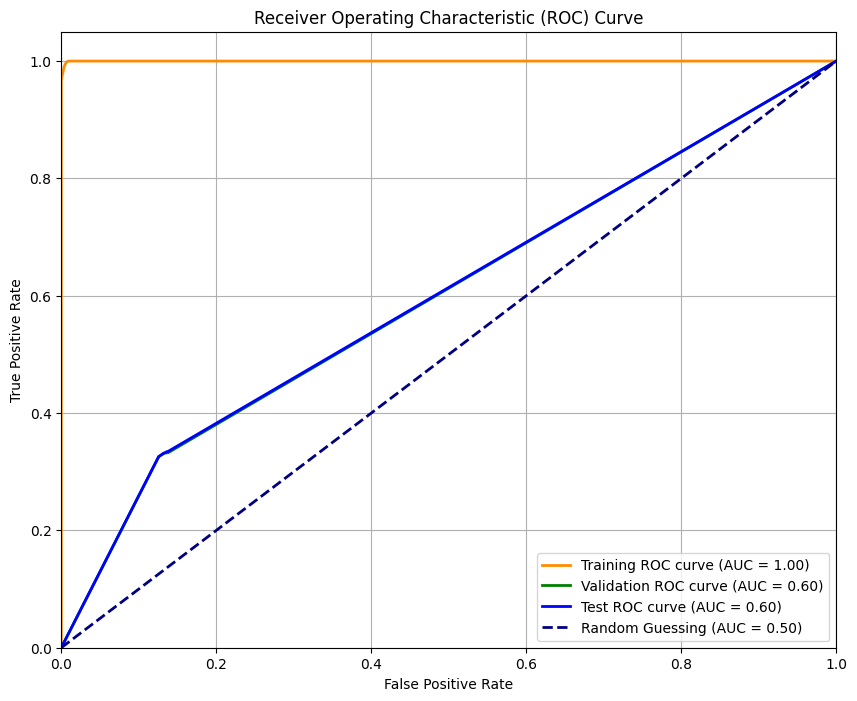

Training AUC: 0.9999
Validation AUC: 0.5988
Test AUC: 0.5998


In [ ]:
# Get predicted probabilities for the training, validation, and test sets
y_train_proba = dt_model.predict_proba(X_train)[:, 1] # Probability of the positive class (1)
y_val_proba = dt_model.predict_proba(X_val)[:, 1]
y_test_proba = dt_model.predict_proba(X_test)[:, 1]

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

# Calculate ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_numeric, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for the validation set
fpr_val, tpr_val, thresholds_val = roc_curve(y_val_numeric, y_val_proba)
roc_auc_val = auc(fpr_val, tpr_val)

# Calculate ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_numeric, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (AUC = %0.2f)' % roc_auc_val)
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.50)') # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Training AUC: {roc_auc_train:.4f}")
print(f"Validation AUC: {roc_auc_val:.4f}")
print(f"Test AUC: {roc_auc_test:.4f}")

In [ ]:
import pandas as pd

# Get the feature importances from the decision tree model
feature_importances_dt = dt_model.feature_importances_

# Get the feature names from the training data (assuming X_train is consistent)
feature_names_dt = X_train.columns

# Create a pandas Series to easily view feature importances with their names
feature_importance_series_dt = pd.Series(feature_importances_dt, index=feature_names_dt)

# Sort the feature importances in descending order
sorted_feature_importances_dt = feature_importance_series_dt.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances for Decision Tree:")
print(sorted_feature_importances_dt)

Feature Importances for Decision Tree:
BMI                     0.137898
Age                     0.103711
Income                  0.103179
PhysHlth                0.089952
Education               0.077287
HighBP                  0.070243
GenHlth                 0.068990
MentHlth                0.068215
Smoker                  0.038524
Fruits                  0.036048
PhysActivity            0.031530
Veggies                 0.030521
Sex                     0.027288
DiffWalk                0.024655
HeartDiseaseorAttack    0.019944
HighChol                0.017891
NoDocbcCost             0.016279
Stroke                  0.015560
AnyHealthcare           0.009871
HvyAlcoholConsump       0.008943
CholCheck               0.003470
dtype: float64


As the model appears to be overfitted, we will implement additional tuning techniques to enhance its generalization and overall performance.

## Iteration 2 - Tuned Parameters

In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [2,5,10],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [2,5,10]
}

print("Parameter grid defined:")
print(param_grid)

Parameter grid defined:
{'max_depth': [2, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 5, 10]}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best cross-validation score
print("Best hyperparameters found:", grid_search.best_params_)
print("Best cross-validation F1-score:", grid_search.best_score_)

Best hyperparameters found: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation F1-score: 0.8274831837997426


In [ ]:
# The number of splits in a decision tree is the number of internal nodes.
# This is equal to the total number of nodes minus the number of leaf nodes.
# We can access the tree structure from the tuned_dt_model.tree_ attribute.

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


# Instantiate a new Decision Tree Classifier with the best hyperparameters
tuned_dt_model = DecisionTreeClassifier(**best_params, random_state=42)

# Train the tuned model on the complete training dataset
tuned_dt_model.fit(X_train, y_train)

tree_ = tuned_dt_model.tree_
total_nodes = tree_.node_count
leaf_nodes = tree_.n_leaves

number_of_splits = total_nodes - leaf_nodes

print(f"The tuned decision tree has {number_of_splits} splits (internal nodes).")
print(f"The tuned decision tree has {leaf_nodes} leaves.")

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
The tuned decision tree has 825 splits (internal nodes).
The tuned decision tree has 826 leaves.


### Model Assessment Iteration 2

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Make predictions on training set
y_train_pred_tuned = tuned_dt_model.predict(X_train)
cm_train_tuned = confusion_matrix(y_train, y_train_pred_tuned)

# Make predictions on validation set
y_val_pred_tuned = tuned_dt_model.predict(X_val)
cm_val_tuned = confusion_matrix(y_val, y_val_pred_tuned)

# Make predictions on test set
y_test_pred_tuned = tuned_dt_model.predict(X_test)
cm_test_tuned = confusion_matrix(y_test, y_test_pred_tuned)

print("\nConfusion Matrix - Tuned Training Set:")
print(cm_train_tuned)

print("\nConfusion Matrix - Tuned Validation Set:")
print(cm_val_tuned)

print("\nConfusion Matrix - Tuned Test Set:")
print(cm_test_tuned)

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

# Convert predicted values to numeric type
y_train_pred_numeric_tuned = pd.to_numeric(y_train_pred_tuned)
y_val_pred_numeric_tuned = pd.to_numeric(y_val_pred_tuned)
y_test_pred_numeric_tuned = pd.to_numeric(y_test_pred_tuned)

# Calculate metrics for Training Set
accuracy_train_tuned = accuracy_score(y_train_numeric, y_train_pred_numeric_tuned)
precision_train_tuned = precision_score(y_train_numeric, y_train_pred_numeric_tuned)
recall_train_tuned = recall_score(y_train_numeric, y_train_pred_numeric_tuned)
f1_train_tuned = f1_score(y_train_numeric, y_train_pred_numeric_tuned)

print("\nTuned Training Set Metrics:")
print(f"  Accuracy: {accuracy_train_tuned:.4f}")
print(f"  Precision: {precision_train_tuned:.4f}")
print(f"  Recall: {recall_train_tuned:.4f}")
print(f"  F1-Score: {f1_train_tuned:.4f}")

# Calculate metrics for Validation Set
accuracy_val_tuned = accuracy_score(y_val_numeric, y_val_pred_numeric_tuned)
precision_val_tuned = precision_score(y_val_numeric, y_val_pred_numeric_tuned)
recall_val_tuned = recall_score(y_val_numeric, y_val_pred_numeric_tuned)
f1_val_tuned = f1_score(y_val_numeric, y_val_pred_numeric_tuned)

print("\nTuned Validation Set Metrics:")
print(f"  Accuracy: {accuracy_val_tuned:.4f}")
print(f"  Precision: {precision_val_tuned:.4f}")
print(f"  Recall: {recall_val_tuned:.4f}")
print(f"  F1-Score: {f1_val_tuned:.4f}")


# Calculate metrics for Test Set
accuracy_test_tuned = accuracy_score(y_test_numeric, y_test_pred_numeric_tuned)
precision_test_tuned = precision_score(y_test_numeric, y_test_pred_numeric_tuned)
recall_test_tuned = recall_score(y_test_numeric, y_test_pred_numeric_tuned)
f1_test_tuned = f1_score(y_test_numeric, y_test_pred_numeric_tuned)

print("\nTuned Test Set Metrics:")
print(f"  Accuracy: {accuracy_test_tuned:.4f}")
print(f"  Precision: {precision_test_tuned:.4f}")
print(f"  Recall: {recall_test_tuned:.4f}")
print(f"  F1-Score: {f1_test_tuned:.4f}")


Confusion Matrix - Tuned Training Set:
[[128626   2282]
 [ 17581   3510]]

Confusion Matrix - Tuned Validation Set:
[[42766   859]
 [ 6034  1008]]

Confusion Matrix - Tuned Test Set:
[[42622   878]
 [ 6194   973]]

Tuned Training Set Metrics:
  Accuracy: 0.8693
  Precision: 0.6060
  Recall: 0.1664
  F1-Score: 0.2611

Tuned Validation Set Metrics:
  Accuracy: 0.8640
  Precision: 0.5399
  Recall: 0.1431
  F1-Score: 0.2263

Tuned Test Set Metrics:
  Accuracy: 0.8604
  Precision: 0.5257
  Recall: 0.1358
  F1-Score: 0.2158


In [ ]:
from sklearn.metrics import classification_report

# Show classification report for the training set
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred_tuned))

# Show classification report for the validation set
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, y_val_pred_tuned))

# Show classification report for the test set
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred_tuned))

Classification Report - Training Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    130908
         1.0       0.61      0.17      0.26     21091

    accuracy                           0.87    151999
   macro avg       0.74      0.57      0.59    151999
weighted avg       0.84      0.87      0.84    151999


Classification Report - Validation Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43625
         1.0       0.54      0.14      0.23      7042

    accuracy                           0.86     50667
   macro avg       0.71      0.56      0.58     50667
weighted avg       0.83      0.86      0.83     50667


Classification Report - Test Set:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43500
         1.0       0.53      0.14      0.22      7167

    accuracy                           0.86     50667
   macro avg  

Although tuning helped mitigate overfitting, the performance metrics remained relatively weak, with recall staying low across all three sets.

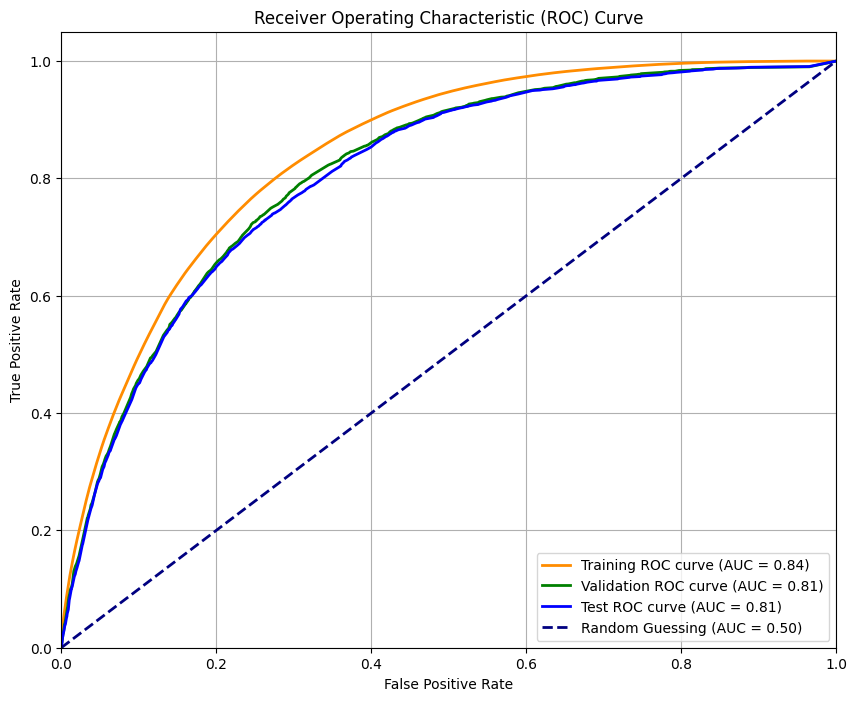

Training AUC: 0.8417
Validation AUC: 0.8126
Test AUC: 0.8080


In [ ]:
# Get predicted probabilities for the training, validation, and test sets
y_train_proba_tuned = tuned_dt_model.predict_proba(X_train)[:, 1] # Probability of the positive class (1)
y_val_proba_tuned = tuned_dt_model.predict_proba(X_val)[:, 1]
y_test_proba_tuned = tuned_dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_numeric, y_train_proba_tuned)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for the validation set
fpr_val, tpr_val, thresholds_val = roc_curve(y_val_numeric, y_val_proba_tuned)
roc_auc_val = auc(fpr_val, tpr_val)

# Calculate ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_numeric, y_test_proba_tuned)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (AUC = %0.2f)' % roc_auc_val)
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.50)') # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Training AUC: {roc_auc_train:.4f}")
print(f"Validation AUC: {roc_auc_val:.4f}")
print(f"Test AUC: {roc_auc_test:.4f}")

In [ ]:
import pandas as pd

# Get the feature importances from the tuned decision tree model
feature_importances_tuned_dt = tuned_dt_model.feature_importances_

# Get the feature names from the training data (assuming X_train is consistent)
feature_names_dt = X_train.columns

# Create a pandas Series to easily view feature importances with their names
feature_importance_series_tuned_dt = pd.Series(feature_importances_tuned_dt, index=feature_names_dt)

# Sort the feature importances in descending order
sorted_feature_importances_tuned_dt = feature_importance_series_tuned_dt.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances for Tuned Decision Tree:")
print(sorted_feature_importances_tuned_dt)

Feature Importances for Tuned Decision Tree:
HighBP                  0.323267
GenHlth                 0.268667
BMI                     0.148588
Age                     0.077722
HighChol                0.059705
Income                  0.017988
HeartDiseaseorAttack    0.013915
PhysHlth                0.012656
MentHlth                0.012603
HvyAlcoholConsump       0.011700
Sex                     0.010413
Education               0.008902
DiffWalk                0.007688
Smoker                  0.005970
PhysActivity            0.005007
Stroke                  0.003368
Fruits                  0.003289
NoDocbcCost             0.003221
Veggies                 0.002292
CholCheck               0.002141
AnyHealthcare           0.000897
dtype: float64


# Boosted Tree Model

## Iteration 1 - All Features

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate a Gradient Boosting Regressor model
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gbc_model.fit(X_train, y_train)

# Make predictions on training set
y_train_pred_gbc = gbc_model.predict(X_train)

# Make predictions on validation set
y_val_pred_gbc = gbc_model.predict(X_val)

# Make predictions on test set
y_test_pred_gbc = gbc_model.predict(X_test)


### Model Assessment Iteration 1

In [ ]:
from sklearn.metrics import confusion_matrix

# Predictions on training set
cm_train = confusion_matrix(y_train, y_train_pred_gbc)

# Predictions on validation set
cm_val = confusion_matrix(y_val, y_val_pred_gbc)

# Predictions on test set
cm_test = confusion_matrix(y_test, y_test_pred_gbc)

print("Confusion Matrix - Training Set:")
print(cm_train)

print("\nConfusion Matrix - Validation Set:")
print(cm_val)

print("\nConfusion Matrix - Test Set:")
print(cm_test)

Confusion Matrix - Training Set:
[[128364   2544]
 [ 17586   3505]]

Confusion Matrix - Validation Set:
[[42800   825]
 [ 5874  1168]]

Confusion Matrix - Test Set:
[[42675   825]
 [ 6051  1116]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

# Convert predicted values to numeric type
y_train_pred_numeric_gbc = pd.to_numeric(y_train_pred_gbc)
y_val_pred_numeric_gbc = pd.to_numeric(y_val_pred_gbc)
y_test_pred_numeric_gbc = pd.to_numeric(y_test_pred_gbc)


# Calculate metrics for Training Set
accuracy_train = accuracy_score(y_train_numeric, y_train_pred_numeric_gbc)
precision_train = precision_score(y_train_numeric, y_train_pred_numeric_gbc)
recall_train = recall_score(y_train_numeric, y_train_pred_numeric_gbc)
f1_train = f1_score(y_train_numeric, y_train_pred_numeric_gbc)

print("Training Set Metrics:")
print(f"  Accuracy: {accuracy_train:.4f}")
print(f"  Precision: {precision_train:.4f}")
print(f"  Recall: {recall_train:.4f}")
print(f"  F1-Score: {f1_train:.4f}")

# Calculate metrics for Validation Set
accuracy_val = accuracy_score(y_val_numeric, y_val_pred_numeric_gbc)
precision_val = precision_score(y_val_numeric, y_val_pred_numeric_gbc)
recall_val = recall_score(y_val_numeric, y_val_pred_numeric_gbc)
f1_val = f1_score(y_val_numeric, y_val_pred_numeric_gbc)

print("\nValidation Set Metrics:")
print(f"  Accuracy: {accuracy_val:.4f}")
print(f"  Precision: {precision_val:.4f}")
print(f"  Recall: {recall_val:.4f}")
print(f"  F1-Score: {f1_val:.4f}")


# Calculate metrics for Test Set
accuracy_test = accuracy_score(y_test_numeric, y_test_pred_numeric_gbc)
precision_test = precision_score(y_test_numeric, y_test_pred_numeric_gbc)
recall_test = recall_score(y_test_numeric, y_test_pred_numeric_gbc)
f1_test = f1_score(y_test_numeric, y_test_pred_numeric_gbc)

print("\nTest Set Metrics:")
print(f"  Accuracy: {accuracy_test:.4f}")
print(f"  Precision: {precision_test:.4f}")
print(f"  Recall: {recall_test:.4f}")
print(f"  F1-Score: {f1_test:.4f}")

Training Set Metrics:
  Accuracy: 0.8676
  Precision: 0.5794
  Recall: 0.1662
  F1-Score: 0.2583

Validation Set Metrics:
  Accuracy: 0.8678
  Precision: 0.5861
  Recall: 0.1659
  F1-Score: 0.2586

Test Set Metrics:
  Accuracy: 0.8643
  Precision: 0.5750
  Recall: 0.1557
  F1-Score: 0.2451


In [ ]:
from sklearn.metrics import classification_report

# Show classification report for the training set
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred_gbc))

# Show classification report for the validation set
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, y_val_pred_gbc))

# Show classification report for the test set
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred_gbc))

Classification Report - Training Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    130908
         1.0       0.58      0.17      0.26     21091

    accuracy                           0.87    151999
   macro avg       0.73      0.57      0.59    151999
weighted avg       0.84      0.87      0.83    151999


Classification Report - Validation Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43625
         1.0       0.59      0.17      0.26      7042

    accuracy                           0.87     50667
   macro avg       0.73      0.57      0.59     50667
weighted avg       0.84      0.87      0.83     50667


Classification Report - Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43500
         1.0       0.57      0.16      0.25      7167

    accuracy                           0.86     50667
   macro avg  

Model performs well on class 0 but shows consistently low recall for the minority class 1 across train, validation, and test sets.

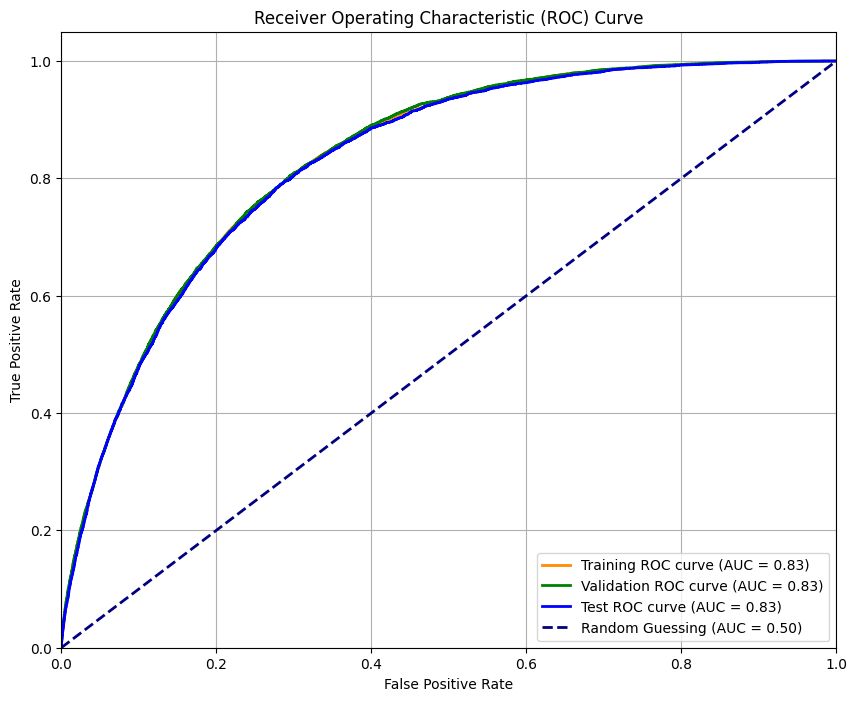

Training AUC: 0.8313
Validation AUC: 0.8327
Test AUC: 0.8293


In [ ]:
# Get predicted probabilities for the training, validation, and test sets
y_train_proba = gbc_model.predict_proba(X_train)[:, 1] # Probability of the positive class (1)
y_val_proba = gbc_model.predict_proba(X_val)[:, 1]
y_test_proba = gbc_model.predict_proba(X_test)[:, 1]

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

# Calculate ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_numeric, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for the validation set
fpr_val, tpr_val, thresholds_val = roc_curve(y_val_numeric, y_val_proba)
roc_auc_val = auc(fpr_val, tpr_val)

# Calculate ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_numeric, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (AUC = %0.2f)' % roc_auc_val)
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.50)') # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Training AUC: {roc_auc_train:.4f}")
print(f"Validation AUC: {roc_auc_val:.4f}")
print(f"Test AUC: {roc_auc_test:.4f}")

In [ ]:
import pandas as pd

# Get the feature importances from the tuned gradient boosting regressor model
feature_importances_gbc = gbc_model.feature_importances_

# Get the feature names from the training data
feature_names = X_train.columns

# Create a pandas Series to easily view feature importances with their names
feature_importance_series_gbc = pd.Series(feature_importances_gbc, index=feature_names)

# Sort the feature importances in descending order
sorted_feature_importances_gbc = feature_importance_series_gbc.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances for Gradient Boosting Classifier:")
print(sorted_feature_importances_gbc)

Feature Importances for Gradient Boosting Classifier:
GenHlth                 0.291102
HighBP                  0.281781
BMI                     0.167804
Age                     0.083091
HighChol                0.074170
DiffWalk                0.030227
HeartDiseaseorAttack    0.023914
HvyAlcoholConsump       0.012734
Income                  0.012166
Sex                     0.005950
CholCheck               0.005303
Stroke                  0.003802
Education               0.002300
MentHlth                0.002006
PhysHlth                0.001596
Fruits                  0.000485
Smoker                  0.000433
Veggies                 0.000375
PhysActivity            0.000370
AnyHealthcare           0.000223
NoDocbcCost             0.000169
dtype: float64


## Iteration 2 - Tuned Parameters

In [ ]:
param_grid_gbc = {
    'n_estimators': [100, 300],  # Number of boosting stages
    'learning_rate': [0.1], # Shrinkage on the contributions of each tree
    'max_depth': [3, 5],           # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 10]    # Minimum number of samples required to split an internal node
}


# Instantiate GridSearchCV with the Gradient Boosting Classifier and the parameter grid
grid_search_gbc = GridSearchCV(gbc_model, param_grid_gbc, cv=2, scoring='f1_weighted', n_jobs=-1,verbose=3)


# Fit GridSearchCV to the training data
grid_search_gbc.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 300]},
             scoring='f1_weighted', verbose=3)

In [ ]:
# Retrieve the best hyperparameters
best_params = grid_search_gbc.best_params_
print("Best hyperparameters:", best_params)


# Instantiate a new GB Classifier with the best hyperparameters
tuned_gbc_model = GradientBoostingClassifier(**best_params, random_state=42)

# Train the tuned model on the complete training dataset
tuned_gbc_model.fit(X_train, y_train)


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 300}


GradientBoostingClassifier(min_samples_split=10, n_estimators=300,
                           random_state=42)

In [ ]:
# Make predictions on training set
y_train_pred_tuned_gbc = tuned_gbc_model.predict(X_train)

# Make predictions on validation set
y_val_pred_tuned_gbc = tuned_gbc_model.predict(X_val)

# Make predictions on test set
y_test_pred_tuned_gbc = tuned_gbc_model.predict(X_test)

### Model Assessment Iteration 2

In [ ]:
from sklearn.metrics import confusion_matrix

# Predictions on training set
cm_train = confusion_matrix(y_train, y_train_pred_tuned_gbc)

# Predictions on validation set
cm_val = confusion_matrix(y_val, y_val_pred_tuned_gbc)

# Predictions on test set
cm_test = confusion_matrix(y_test, y_test_pred_tuned_gbc)

print("Confusion Matrix - Training Set:")
print(cm_train)

print("\nConfusion Matrix - Validation Set:")
print(cm_val)

print("\nConfusion Matrix - Test Set:")
print(cm_test)

Confusion Matrix - Training Set:
[[128434   2474]
 [ 17401   3690]]

Confusion Matrix - Validation Set:
[[42790   835]
 [ 5862  1180]]

Confusion Matrix - Test Set:
[[42652   848]
 [ 6014  1153]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

# Convert predicted values to numeric type
y_train_pred_numeric_tuned_gbc = pd.to_numeric(y_train_pred_tuned_gbc)
y_val_pred_numeric_tuned_gbc = pd.to_numeric(y_val_pred_tuned_gbc)
y_test_pred_numeric_tuned_gbc = pd.to_numeric(y_test_pred_tuned_gbc)


# Calculate metrics for Training Set
accuracy_train = accuracy_score(y_train_numeric, y_train_pred_numeric_tuned_gbc)
precision_train = precision_score(y_train_numeric, y_train_pred_numeric_tuned_gbc)
recall_train = recall_score(y_train_numeric, y_train_pred_numeric_tuned_gbc)
f1_train = f1_score(y_train_numeric, y_train_pred_numeric_tuned_gbc)

print("Training Set Metrics:")
print(f"  Accuracy: {accuracy_train:.4f}")
print(f"  Precision: {precision_train:.4f}")
print(f"  Recall: {recall_train:.4f}")
print(f"  F1-Score: {f1_train:.4f}")

# Calculate metrics for Validation Set
accuracy_val = accuracy_score(y_val_numeric, y_val_pred_numeric_tuned_gbc)
precision_val = precision_score(y_val_numeric, y_val_pred_numeric_tuned_gbc)
recall_val = recall_score(y_val_numeric, y_val_pred_numeric_tuned_gbc)
f1_val = f1_score(y_val_numeric, y_val_pred_numeric_tuned_gbc)

print("\nValidation Set Metrics:")
print(f"  Accuracy: {accuracy_val:.4f}")
print(f"  Precision: {precision_val:.4f}")
print(f"  Recall: {recall_val:.4f}")
print(f"  F1-Score: {f1_val:.4f}")


# Calculate metrics for Test Set
accuracy_test = accuracy_score(y_test_numeric, y_test_pred_numeric_tuned_gbc)
precision_test = precision_score(y_test_numeric, y_test_pred_numeric_tuned_gbc)
recall_test = recall_score(y_test_numeric, y_test_pred_numeric_tuned_gbc)
f1_test = f1_score(y_test_numeric, y_test_pred_numeric_tuned_gbc)

print("\nTest Set Metrics:")
print(f"  Accuracy: {accuracy_test:.4f}")
print(f"  Precision: {precision_test:.4f}")
print(f"  Recall: {recall_test:.4f}")
print(f"  F1-Score: {f1_test:.4f}")

Training Set Metrics:
  Accuracy: 0.8692
  Precision: 0.5986
  Recall: 0.1750
  F1-Score: 0.2708

Validation Set Metrics:
  Accuracy: 0.8678
  Precision: 0.5856
  Recall: 0.1676
  F1-Score: 0.2606

Test Set Metrics:
  Accuracy: 0.8646
  Precision: 0.5762
  Recall: 0.1609
  F1-Score: 0.2515


In [ ]:
from sklearn.metrics import classification_report

# Show classification report for the training set
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred_tuned_gbc))

# Show classification report for the validation set
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, y_val_pred_tuned_gbc))

# Show classification report for the test set
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred_tuned_gbc))

Classification Report - Training Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    130908
         1.0       0.60      0.17      0.27     21091

    accuracy                           0.87    151999
   macro avg       0.74      0.58      0.60    151999
weighted avg       0.84      0.87      0.84    151999


Classification Report - Validation Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43625
         1.0       0.59      0.17      0.26      7042

    accuracy                           0.87     50667
   macro avg       0.73      0.57      0.59     50667
weighted avg       0.84      0.87      0.83     50667


Classification Report - Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43500
         1.0       0.58      0.16      0.25      7167

    accuracy                           0.86     50667
   macro avg  

After tuning, the model continued to struggle with identifying the minority class, as shown by persistently low recall in all datasets.

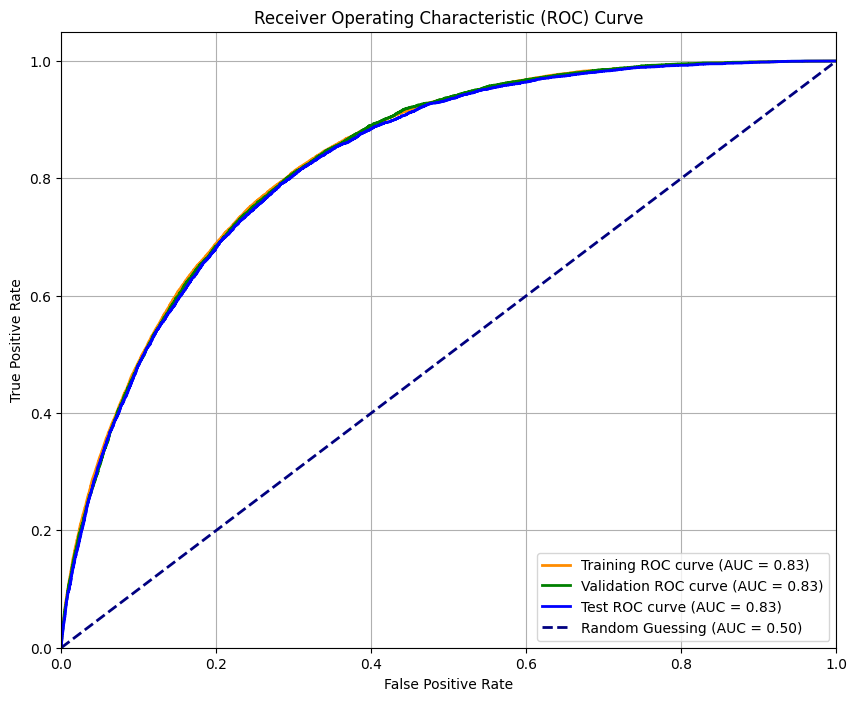

Training AUC: 0.8347
Validation AUC: 0.8331
Test AUC: 0.8300


In [ ]:
# Get predicted probabilities for the training, validation, and test sets
y_train_proba = tuned_gbc_model.predict_proba(X_train)[:, 1] # Probability of the positive class (1)
y_val_proba = tuned_gbc_model.predict_proba(X_val)[:, 1]
y_test_proba = tuned_gbc_model.predict_proba(X_test)[:, 1]

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

# Calculate ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_numeric, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for the validation set
fpr_val, tpr_val, thresholds_val = roc_curve(y_val_numeric, y_val_proba)
roc_auc_val = auc(fpr_val, tpr_val)

# Calculate ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_numeric, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (AUC = %0.2f)' % roc_auc_val)
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.50)') # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Training AUC: {roc_auc_train:.4f}")
print(f"Validation AUC: {roc_auc_val:.4f}")
print(f"Test AUC: {roc_auc_test:.4f}")

In [ ]:
import pandas as pd

# Get the feature importances from the tuned gradient boosting regressor model
feature_importances_tuned_gbc = tuned_gbc_model.feature_importances_

# Get the feature names from the training data
feature_names = X_train.columns

# Create a pandas Series to easily view feature importances with their names
feature_importance_series_tuned_gbc = pd.Series(feature_importances_tuned_gbc, index=feature_names)

# Sort the feature importances in descending order
sorted_feature_importances_tuned_gbc = feature_importance_series_tuned_gbc.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances for Tuned Gradient Boosting Classifier:")
print(sorted_feature_importances_tuned_gbc)

Feature Importances for Tuned Gradient Boosting Classifier:
GenHlth                 0.285993
HighBP                  0.274208
BMI                     0.168613
Age                     0.083484
HighChol                0.072225
DiffWalk                0.030378
HeartDiseaseorAttack    0.024790
Income                  0.014759
HvyAlcoholConsump       0.012450
Sex                     0.005997
CholCheck               0.005245
MentHlth                0.004925
PhysHlth                0.004072
Stroke                  0.004029
Education               0.003544
Fruits                  0.001401
Smoker                  0.000996
PhysActivity            0.000973
Veggies                 0.000887
AnyHealthcare           0.000546
NoDocbcCost             0.000486
dtype: float64


# Bootstrap Forest Model

## Iteration 1 - All Features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Instantiate a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on training set
y_train_pred_rf = rf_model.predict(X_train)

# Make predictions on validation set
y_val_pred_rf = rf_model.predict(X_val)

# Make predictions on test set
y_test_pred_rf = rf_model.predict(X_test)

### Model Assessment Iteration 1

In [ ]:
from sklearn.metrics import confusion_matrix

# Predictions on training set
cm_train = confusion_matrix(y_train, y_train_pred_rf)

# Predictions on validation set
cm_val = confusion_matrix(y_val, y_val_pred_rf)

# Predictions on test set
cm_test = confusion_matrix(y_test, y_test_pred_rf)

print("Confusion Matrix - Training Set:")
print(cm_train)

print("\nConfusion Matrix - Validation Set:")
print(cm_val)

print("\nConfusion Matrix - Test Set:")
print(cm_test)

Confusion Matrix - Training Set:
[[130812     96]
 [   591  20500]]

Confusion Matrix - Validation Set:
[[42452  1173]
 [ 5910  1132]]

Confusion Matrix - Test Set:
[[42331  1169]
 [ 5995  1172]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

# Convert predicted values to numeric type
y_train_pred_numeric_rf = pd.to_numeric(y_train_pred_rf)
y_val_pred_numeric_rf = pd.to_numeric(y_val_pred_rf)
y_test_pred_numeric_rf = pd.to_numeric(y_test_pred_rf)


# Calculate metrics for Training Set
accuracy_train = accuracy_score(y_train_numeric, y_train_pred_numeric_rf)
precision_train = precision_score(y_train_numeric, y_train_pred_numeric_rf)
recall_train = recall_score(y_train_numeric, y_train_pred_numeric_rf)
f1_train = f1_score(y_train_numeric, y_train_pred_numeric_rf)

print("Training Set Metrics:")
print(f"  Accuracy: {accuracy_train:.4f}")
print(f"  Precision: {precision_train:.4f}")
print(f"  Recall: {recall_train:.4f}")
print(f"  F1-Score: {f1_train:.4f}")

# Calculate metrics for Validation Set
accuracy_val = accuracy_score(y_val_numeric, y_val_pred_numeric_rf)
precision_val = precision_score(y_val_numeric, y_val_pred_numeric_rf)
recall_val = recall_score(y_val_numeric, y_val_pred_numeric_rf)
f1_val = f1_score(y_val_numeric, y_val_pred_numeric_rf)

print("\nValidation Set Metrics:")
print(f"  Accuracy: {accuracy_val:.4f}")
print(f"  Precision: {precision_val:.4f}")
print(f"  Recall: {recall_val:.4f}")
print(f"  F1-Score: {f1_val:.4f}")


# Calculate metrics for Test Set
accuracy_test = accuracy_score(y_test_numeric, y_test_pred_numeric_rf)
precision_test = precision_score(y_test_numeric, y_test_pred_numeric_rf)
recall_test = recall_score(y_test_numeric, y_test_pred_numeric_rf)
f1_test = f1_score(y_test_numeric, y_test_pred_numeric_rf)

print("\nTest Set Metrics:")
print(f"  Accuracy: {accuracy_test:.4f}")
print(f"  Precision: {precision_test:.4f}")
print(f"  Recall: {recall_test:.4f}")
print(f"  F1-Score: {f1_test:.4f}")

Training Set Metrics:
  Accuracy: 0.9955
  Precision: 0.9953
  Recall: 0.9720
  F1-Score: 0.9835

Validation Set Metrics:
  Accuracy: 0.8602
  Precision: 0.4911
  Recall: 0.1607
  F1-Score: 0.2422

Test Set Metrics:
  Accuracy: 0.8586
  Precision: 0.5006
  Recall: 0.1635
  F1-Score: 0.2465


In [ ]:
from sklearn.metrics import classification_report

# Show classification report for the training set
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred_rf))

# Show classification report for the validation set
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, y_val_pred_rf))

# Show classification report for the test set
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred_rf))

Classification Report - Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    130908
         1.0       1.00      0.97      0.98     21091

    accuracy                           1.00    151999
   macro avg       1.00      0.99      0.99    151999
weighted avg       1.00      1.00      1.00    151999


Classification Report - Validation Set:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43625
         1.0       0.49      0.16      0.24      7042

    accuracy                           0.86     50667
   macro avg       0.68      0.57      0.58     50667
weighted avg       0.82      0.86      0.83     50667


Classification Report - Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43500
         1.0       0.50      0.16      0.25      7167

    accuracy                           0.86     50667
   macro avg  

The model shows overfitting, performing almost perfectly on the training data while continuing to exhibit poor recall for the minority class on both validation and test sets.

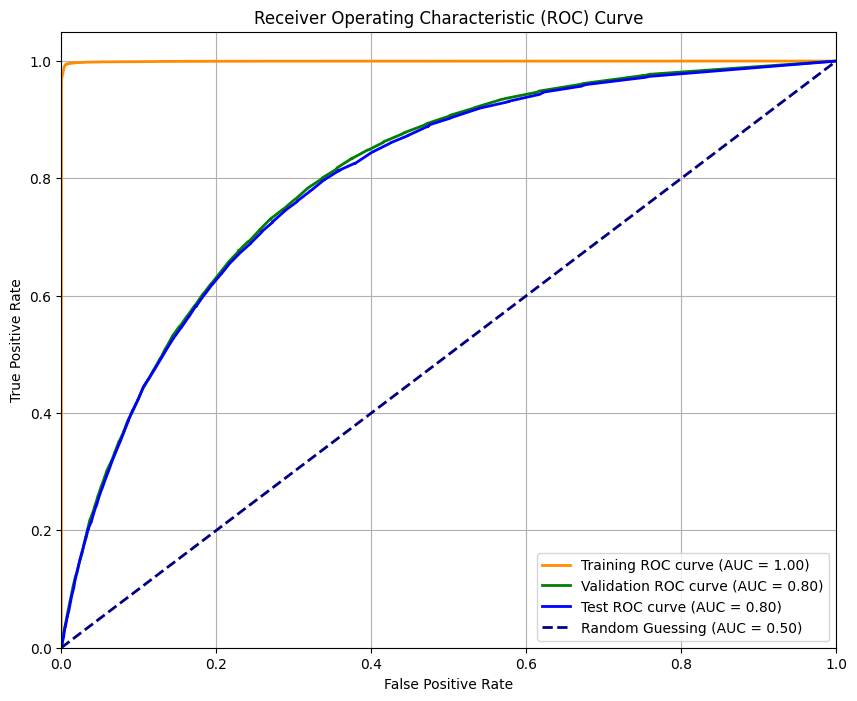

Training AUC: 0.9996
Validation AUC: 0.8020
Test AUC: 0.7979


In [ ]:
# Get predicted probabilities for the training, validation, and test sets
y_train_proba = rf_model.predict_proba(X_train)[:, 1] # Probability of the positive class (1)
y_val_proba = rf_model.predict_proba(X_val)[:, 1]
y_test_proba = rf_model.predict_proba(X_test)[:, 1]

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

# Calculate ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_numeric, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for the validation set
fpr_val, tpr_val, thresholds_val = roc_curve(y_val_numeric, y_val_proba)
roc_auc_val = auc(fpr_val, tpr_val)

# Calculate ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_numeric, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (AUC = %0.2f)' % roc_auc_val)
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.50)') # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Training AUC: {roc_auc_train:.4f}")
print(f"Validation AUC: {roc_auc_val:.4f}")
print(f"Test AUC: {roc_auc_test:.4f}")

In [ ]:
import pandas as pd

# Get the feature importances from the decision tree model
feature_importances_rf = rf_model.feature_importances_

# Get the feature names from the training data (assuming X_train is consistent)
feature_names_rf = X_train.columns

# Create a pandas Series to easily view feature importances with their names
feature_importance_series_rf = pd.Series(feature_importances_rf, index=feature_names_rf)

# Sort the feature importances in descending order
sorted_feature_importances_rf = feature_importance_series_rf.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances for Random Forest:")
print(sorted_feature_importances_rf)

Feature Importances for Random Forest:
BMI                     0.181561
Age                     0.123542
Income                  0.099060
PhysHlth                0.083545
Education               0.070799
GenHlth                 0.070664
MentHlth                0.063578
HighBP                  0.043097
Fruits                  0.033024
Smoker                  0.032821
Sex                     0.028935
HighChol                0.026832
Veggies                 0.026621
PhysActivity            0.025538
DiffWalk                0.023873
HeartDiseaseorAttack    0.018254
NoDocbcCost             0.015100
Stroke                  0.012580
AnyHealthcare           0.008859
HvyAlcoholConsump       0.008114
CholCheck               0.003604
dtype: float64


## Iteration 2 - Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Instantiate a Random Forest Classifier model
rf_tuned_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)

# Train the model on the training data
rf_tuned_model.fit(X_train, y_train)

# Make predictions on training set
y_train_pred_rf_tuned = rf_tuned_model.predict(X_train)

# Make predictions on validation set
y_val_pred_rf_tuned = rf_tuned_model.predict(X_val)

# Make predictions on test set
y_test_pred_rf_tuned = rf_tuned_model.predict(X_test)

Given the long runtime (several hours) of GridSearchCV, we opted to use the strongest hyperparameter set obtained during the search instead of running process again to improve efficiency.

### Model Assessment Iteration 2

In [ ]:
from sklearn.metrics import confusion_matrix

# Predictions on training set
cm_train = confusion_matrix(y_train, y_train_pred_rf_tuned)

# Predictions on validation set
cm_val = confusion_matrix(y_val, y_val_pred_rf_tuned)

# Predictions on test set
cm_test = confusion_matrix(y_test, y_test_pred_rf_tuned)

print("Confusion Matrix - Training Set:")
print(cm_train)

print("\nConfusion Matrix - Validation Set:")
print(cm_val)

print("\nConfusion Matrix - Test Set:")
print(cm_test)

Confusion Matrix - Training Set:
[[129907   1001]
 [ 17982   3109]]

Confusion Matrix - Validation Set:
[[43191   434]
 [ 6259   783]]

Confusion Matrix - Test Set:
[[43007   493]
 [ 6437   730]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

# Convert predicted values to numeric type
y_train_pred_numeric_rf_tuned = pd.to_numeric(y_train_pred_rf_tuned)
y_val_pred_numeric_rf_tuned = pd.to_numeric(y_val_pred_rf_tuned)
y_test_pred_numeric_rf_tuned = pd.to_numeric(y_test_pred_rf_tuned)


# Calculate metrics for Training Set
accuracy_train = accuracy_score(y_train_numeric, y_train_pred_numeric_rf_tuned)
precision_train = precision_score(y_train_numeric, y_train_pred_numeric_rf_tuned)
recall_train = recall_score(y_train_numeric, y_train_pred_numeric_rf_tuned)
f1_train = f1_score(y_train_numeric, y_train_pred_numeric_rf_tuned)

print("Training Set Metrics:")
print(f"  Accuracy: {accuracy_train:.4f}")
print(f"  Precision: {precision_train:.4f}")
print(f"  Recall: {recall_train:.4f}")
print(f"  F1-Score: {f1_train:.4f}")

# Calculate metrics for Validation Set
accuracy_val = accuracy_score(y_val_numeric, y_val_pred_numeric_rf_tuned)
precision_val = precision_score(y_val_numeric, y_val_pred_numeric_rf_tuned)
recall_val = recall_score(y_val_numeric, y_val_pred_numeric_rf_tuned)
f1_val = f1_score(y_val_numeric, y_val_pred_numeric_rf_tuned)

print("\nValidation Set Metrics:")
print(f"  Accuracy: {accuracy_val:.4f}")
print(f"  Precision: {precision_val:.4f}")
print(f"  Recall: {recall_val:.4f}")
print(f"  F1-Score: {f1_val:.4f}")


# Calculate metrics for Test Set
accuracy_test = accuracy_score(y_test_numeric, y_test_pred_numeric_rf_tuned)
precision_test = precision_score(y_test_numeric, y_test_pred_numeric_rf_tuned)
recall_test = recall_score(y_test_numeric, y_test_pred_numeric_rf_tuned)
f1_test = f1_score(y_test_numeric, y_test_pred_numeric_rf_tuned)

print("\nTest Set Metrics:")
print(f"  Accuracy: {accuracy_test:.4f}")
print(f"  Precision: {precision_test:.4f}")
print(f"  Recall: {recall_test:.4f}")
print(f"  F1-Score: {f1_test:.4f}")

Training Set Metrics:
  Accuracy: 0.8751
  Precision: 0.7564
  Recall: 0.1474
  F1-Score: 0.2467

Validation Set Metrics:
  Accuracy: 0.8679
  Precision: 0.6434
  Recall: 0.1112
  F1-Score: 0.1896

Test Set Metrics:
  Accuracy: 0.8632
  Precision: 0.5969
  Recall: 0.1019
  F1-Score: 0.1740


In [ ]:
from sklearn.metrics import classification_report

# Show classification report for the training set
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred_rf_tuned))

# Show classification report for the validation set
print("\nClassification Report - Validation Set:")
print(classification_report(y_val, y_val_pred_rf_tuned))

# Show classification report for the test set
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred_rf_tuned))

Classification Report - Training Set:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93    130908
         1.0       0.76      0.15      0.25     21091

    accuracy                           0.88    151999
   macro avg       0.82      0.57      0.59    151999
weighted avg       0.86      0.88      0.84    151999


Classification Report - Validation Set:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43625
         1.0       0.64      0.11      0.19      7042

    accuracy                           0.87     50667
   macro avg       0.76      0.55      0.56     50667
weighted avg       0.84      0.87      0.83     50667


Classification Report - Test Set:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43500
         1.0       0.60      0.10      0.17      7167

    accuracy                           0.86     50667
   macro avg  

This model predicts the majority class really well, but it still struggles to identify true positive cases, showing strong accuracy but very low recall for diabetes (class 1).

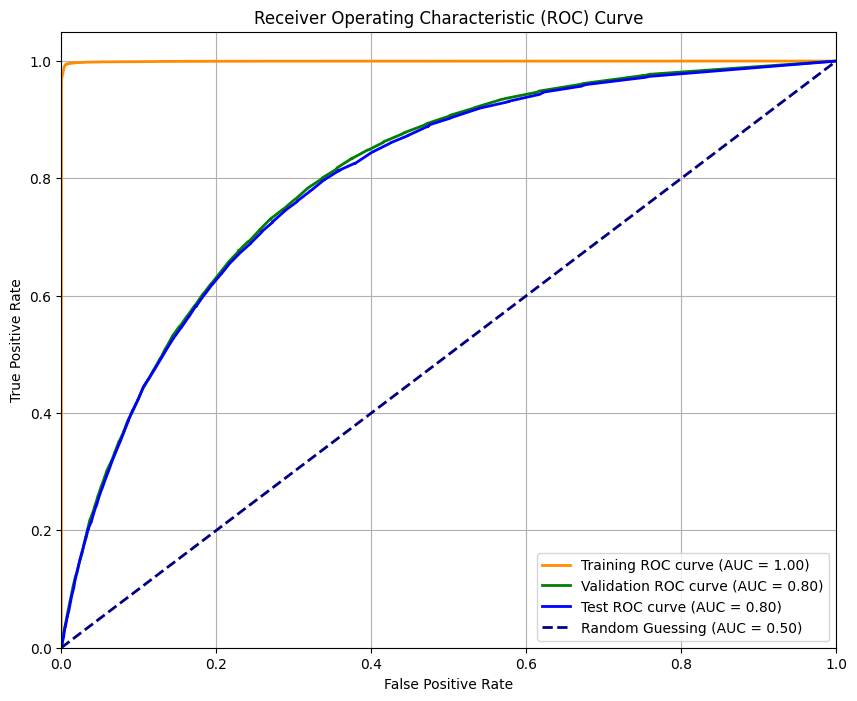

Training AUC: 0.9996
Validation AUC: 0.8020
Test AUC: 0.7979


In [ ]:
# Get predicted probabilities for the training, validation, and test sets
y_train_proba = rf_model.predict_proba(X_train)[:, 1] # Probability of the positive class (1)
y_val_proba = rf_model.predict_proba(X_val)[:, 1]
y_test_proba = rf_model.predict_proba(X_test)[:, 1]

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

# Calculate ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_numeric, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for the validation set
fpr_val, tpr_val, thresholds_val = roc_curve(y_val_numeric, y_val_proba)
roc_auc_val = auc(fpr_val, tpr_val)

# Calculate ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_numeric, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (AUC = %0.2f)' % roc_auc_val)
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.50)') # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Training AUC: {roc_auc_train:.4f}")
print(f"Validation AUC: {roc_auc_val:.4f}")
print(f"Test AUC: {roc_auc_test:.4f}")

In [ ]:
import pandas as pd

# Get the feature importances from the decision tree model
feature_importances_rf_tuned = rf_tuned_model.feature_importances_

# Get the feature names from the training data (assuming X_train is consistent)
feature_names_rf_tuned = X_train.columns

# Create a pandas Series to easily view feature importances with their names
feature_importance_series_rf_tuned = pd.Series(feature_importances_rf_tuned, index=feature_names_rf)

# Sort the feature importances in descending order
sorted_feature_importances_rf_tuned = feature_importance_series_rf_tuned.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances for Random Forest (tuned):")
print(sorted_feature_importances_rf_tuned)

Feature Importances for Random Forest (tuned):
GenHlth                 0.180622
BMI                     0.165206
HighBP                  0.161323
Age                     0.080895
HighChol                0.077524
DiffWalk                0.060234
PhysHlth                0.047387
Income                  0.043569
HeartDiseaseorAttack    0.036591
MentHlth                0.027164
Education               0.025681
PhysActivity            0.014292
Sex                     0.013056
Stroke                  0.010805
HvyAlcoholConsump       0.010517
Smoker                  0.010479
Fruits                  0.009541
Veggies                 0.009234
NoDocbcCost             0.006864
AnyHealthcare           0.004675
CholCheck               0.004341
dtype: float64


# Neural Network Model

## Iteration 1 - All Features

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import mean_squared_error # Import mean_squared_error to calculate MSE first

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Build the neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=200, random_state=42, learning_rate_init=0.01)

# Train the model
nn_model.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(50, 25), learning_rate_init=0.01,
              random_state=42)

### Model Assessment Iteration 1

Training Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93    130908
         1.0       0.60      0.22      0.32     21091

    accuracy                           0.87    151999
   macro avg       0.75      0.60      0.63    151999
weighted avg       0.85      0.87      0.85    151999


Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93     43625
         1.0       0.54      0.19      0.28      7042

    accuracy                           0.86     50667
   macro avg       0.71      0.58      0.60     50667
weighted avg       0.83      0.86      0.84     50667


Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43500
         1.0       0.54      0.19      0.28      7167

    accuracy                           0.86     50667
   macro avg       0

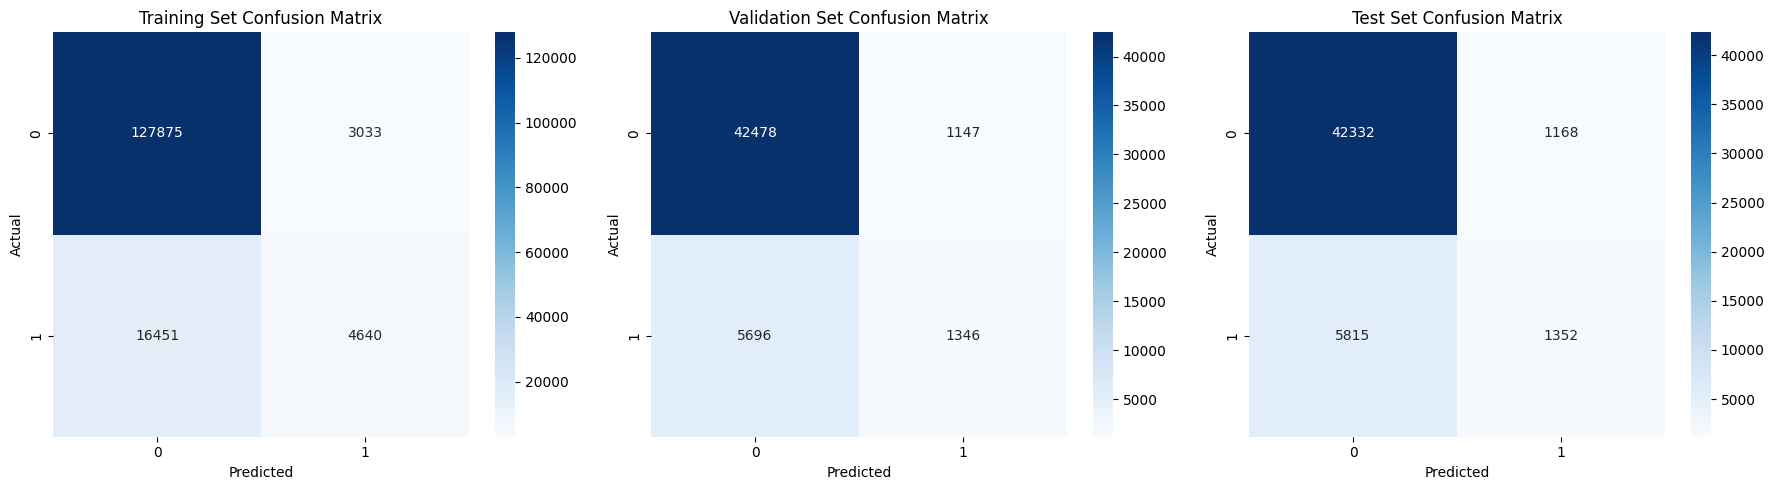

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


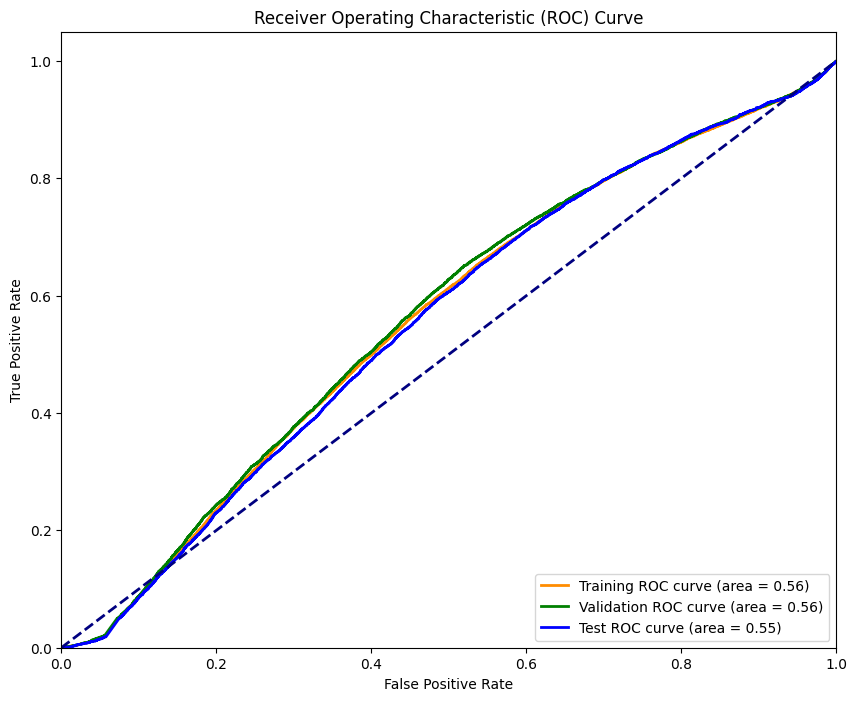

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the training, validation, and test sets
y_train_pred_nn = nn_model.predict(X_train_scaled)
y_val_pred_nn = nn_model.predict(X_val_scaled)
y_test_pred_nn = nn_model.predict(X_test_scaled)

# Print classification reports (includes precision, recall, f1-score, and support)
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred_nn))

print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred_nn))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred_nn))


# Calculate confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred_nn)
conf_matrix_val = confusion_matrix(y_val, y_val_pred_nn)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_nn)

# Calculate accuracy scores
accuracy_train = accuracy_score(y_train, y_train_pred_nn)
accuracy_val = accuracy_score(y_val, y_val_pred_nn)
accuracy_test = accuracy_score(y_test, y_test_pred_nn)


# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Set Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['0', '1']) # Updated labels
axes[0].set_yticklabels(['0', '1']) # Updated labels


sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Validation Set Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['0', '1']) # Updated labels
axes[1].set_yticklabels(['0', '1']) # Updated labels


sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Test Set Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_xticklabels(['0', '1']) # Updated labels
axes[2].set_yticklabels(['0', '1']) # Updated labels

plt.tight_layout()
plt.show()


# Calculate ROC curves and AUC
y_train_prob = nn_model.predict_proba(X_train)[:, 1]
y_val_prob = nn_model.predict_proba(X_val)[:, 1]
y_test_prob = nn_model.predict_proba(X_test)[:, 1]

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_numeric, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_val, tpr_val, thresholds_val = roc_curve(y_val_numeric, y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test_numeric, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The model shows slightly higher recall for the minority class compared to previous models, but recall remains low across all sets, indicating continued difficulty in detecting class 1. So we tried the model with oversampling to improve the overall performance.

## Iteration 2 - Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the scaled training data
X_train_oversampled_nn, y_train_oversampled_nn = smote.fit_resample(X_train_scaled, y_train)

# Print the shape of the original and oversampled target variables
print("Original y_train shape:", y_train.shape)
print("Oversampled y_train_oversampled_nn shape:", y_train_oversampled_nn.shape)
print("Class distribution after SMOTE:\n", pd.Series(y_train_oversampled_nn).value_counts())

Original y_train shape: (151999,)
Oversampled y_train_oversampled_nn shape: (261816,)
Class distribution after SMOTE:
 Diabetes_binary
0.0    130908
1.0    130908
Name: count, dtype: int64


In [ ]:
nn_model_oversampled = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=200, random_state=42, learning_rate_init=0.01)
nn_model_oversampled.fit(X_train_oversampled_nn, y_train_oversampled_nn)

print("Neural Network model trained successfully with oversampled data.")

Neural Network model trained successfully with oversampled data.


### Model Assessment Iteration 2


Oversampled Training Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81    130908
         1.0       0.81      0.80      0.81    130908

    accuracy                           0.81    261816
   macro avg       0.81      0.81      0.81    261816
weighted avg       0.81      0.81      0.81    261816


Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86     43625
         1.0       0.34      0.62      0.44      7042

    accuracy                           0.78     50667
   macro avg       0.63      0.71      0.65     50667
weighted avg       0.85      0.78      0.80     50667


Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86     43500
         1.0       0.35      0.63      0.45      7167

    accuracy                           0.78     50667
   macr

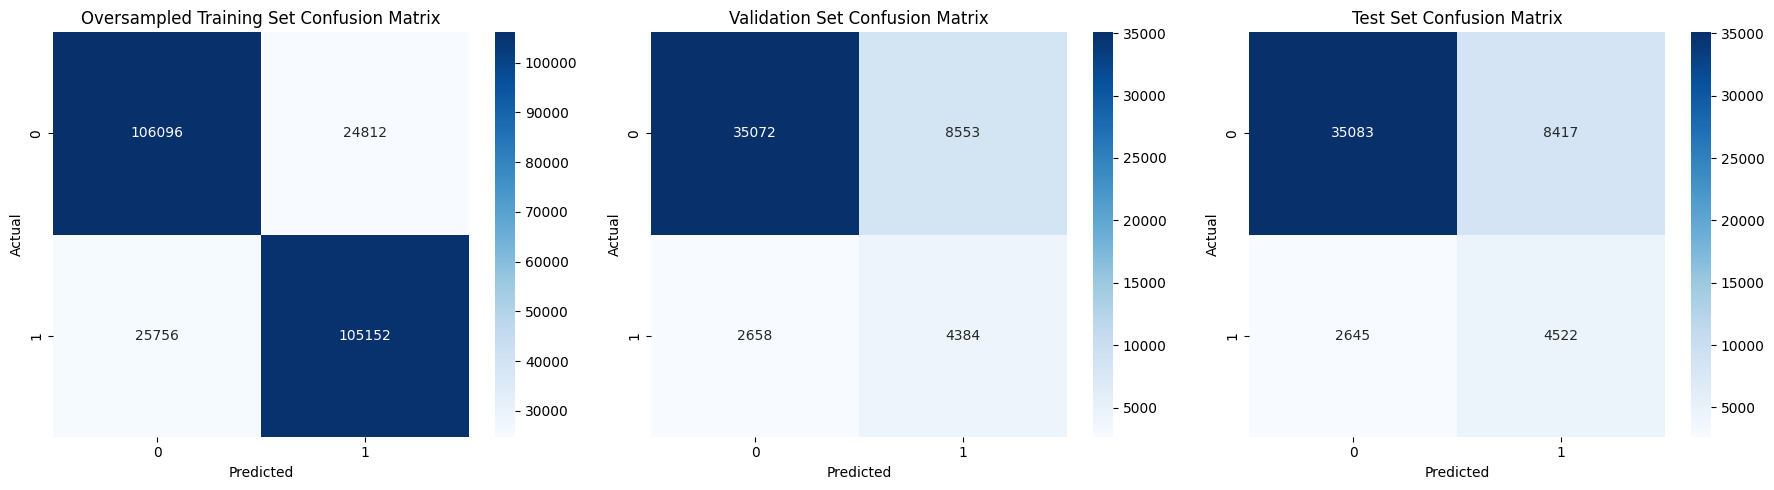

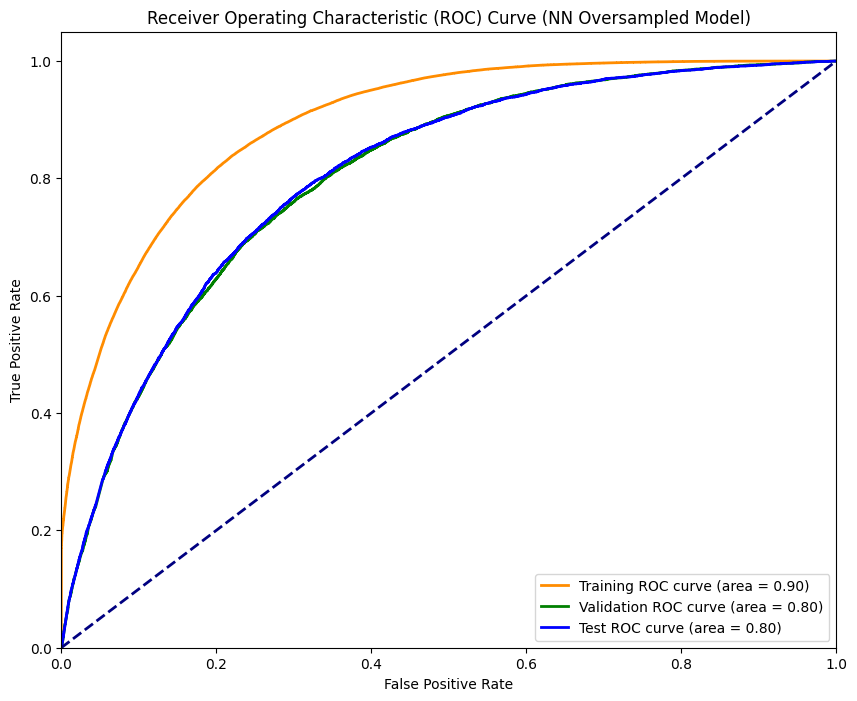


Training AUC (NN Oversampled Model): 0.8958
Validation AUC (NN Oversampled Model): 0.8027
Test AUC (NN Oversampled Model): 0.8046


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the training, validation, and test sets
y_train_pred_nn_oversampled = nn_model_oversampled.predict(X_train_oversampled_nn)
y_val_pred_nn_oversampled = nn_model_oversampled.predict(X_val_scaled)
y_test_pred_nn_oversampled = nn_model_oversampled.predict(X_test_scaled)

# Print classification reports
print("\nOversampled Training Set Classification Report:")
print(classification_report(y_train_oversampled_nn, y_train_pred_nn_oversampled))

print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred_nn_oversampled))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred_nn_oversampled))

# Calculate confusion matrices
conf_matrix_train_oversampled_nn = confusion_matrix(y_train_oversampled_nn, y_train_pred_nn_oversampled)
conf_matrix_val_nn_oversampled = confusion_matrix(y_val, y_val_pred_nn_oversampled)
conf_matrix_test_nn_oversampled = confusion_matrix(y_test, y_test_pred_nn_oversampled)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(conf_matrix_train_oversampled_nn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Oversampled Training Set Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['0', '1'])
axes[0].set_yticklabels(['0', '1'])

sns.heatmap(conf_matrix_val_nn_oversampled, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Validation Set Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['0', '1'])
axes[1].set_yticklabels(['0', '1'])

sns.heatmap(conf_matrix_test_nn_oversampled, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Test Set Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_xticklabels(['0', '1'])
axes[2].set_yticklabels(['0', '1'])

plt.tight_layout()
plt.show()

# Calculate ROC curves and AUC
y_train_prob_nn_oversampled = nn_model_oversampled.predict_proba(X_train_oversampled_nn)[:, 1]
y_val_prob_nn_oversampled = nn_model_oversampled.predict_proba(X_val_scaled)[:, 1]
y_test_prob_nn_oversampled = nn_model_oversampled.predict_proba(X_test_scaled)[:, 1]

# Convert y_train_oversampled_nn to numeric before passing to roc_curve
y_train_oversampled_nn_numeric = pd.to_numeric(y_train_oversampled_nn)

fpr_train_nn_oversampled, tpr_train_nn_oversampled, _ = roc_curve(y_train_oversampled_nn_numeric, y_train_prob_nn_oversampled)
roc_auc_train_nn_oversampled = auc(fpr_train_nn_oversampled, tpr_train_nn_oversampled)

fpr_val_nn_oversampled, tpr_val_nn_oversampled, _ = roc_curve(y_val_numeric, y_val_prob_nn_oversampled)
roc_auc_val_nn_oversampled = auc(fpr_val_nn_oversampled, tpr_val_nn_oversampled)

fpr_test_nn_oversampled, tpr_test_nn_oversampled, _ = roc_curve(y_test_numeric, y_test_prob_nn_oversampled)
roc_auc_test_nn_oversampled = auc(fpr_test_nn_oversampled, tpr_test_nn_oversampled)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train_nn_oversampled, tpr_train_nn_oversampled, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train_nn_oversampled)
plt.plot(fpr_val_nn_oversampled, tpr_val_nn_oversampled, color='green', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val_nn_oversampled)
plt.plot(fpr_test_nn_oversampled, tpr_test_nn_oversampled, color='blue', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test_nn_oversampled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (NN Oversampled Model)')
plt.legend(loc="lower right")
plt.show()

print(f"\nTraining AUC (NN Oversampled Model): {roc_auc_train_nn_oversampled:.4f}")
print(f"Validation AUC (NN Oversampled Model): {roc_auc_val_nn_oversampled:.4f}")
print(f"Test AUC (NN Oversampled Model): {roc_auc_test_nn_oversampled:.4f}")

After applying oversampling, the model significantly improved minority-class recall on the validation and test sets, though this came at the cost of lower precision for class 1 and reduced overall accuracy.

# Discriminant Analysis Model

## Iteration 1 - All Features

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize the LDA model
lda_model = LinearDiscriminantAnalysis()

# Train the model using the training data
lda_model.fit(X_train, y_train)

print("LDA model trained successfully.")

LDA model trained successfully.


### Model Assessment Iteration 1

Training Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92    130908
         1.0       0.51      0.20      0.29     21091

    accuracy                           0.86    151999
   macro avg       0.70      0.59      0.61    151999
weighted avg       0.83      0.86      0.84    151999


Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93     43625
         1.0       0.53      0.21      0.30      7042

    accuracy                           0.86     50667
   macro avg       0.71      0.59      0.61     50667
weighted avg       0.84      0.86      0.84     50667


Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43500
         1.0       0.52      0.20      0.29      7167

    accuracy                           0.86     50667
   macro avg       0

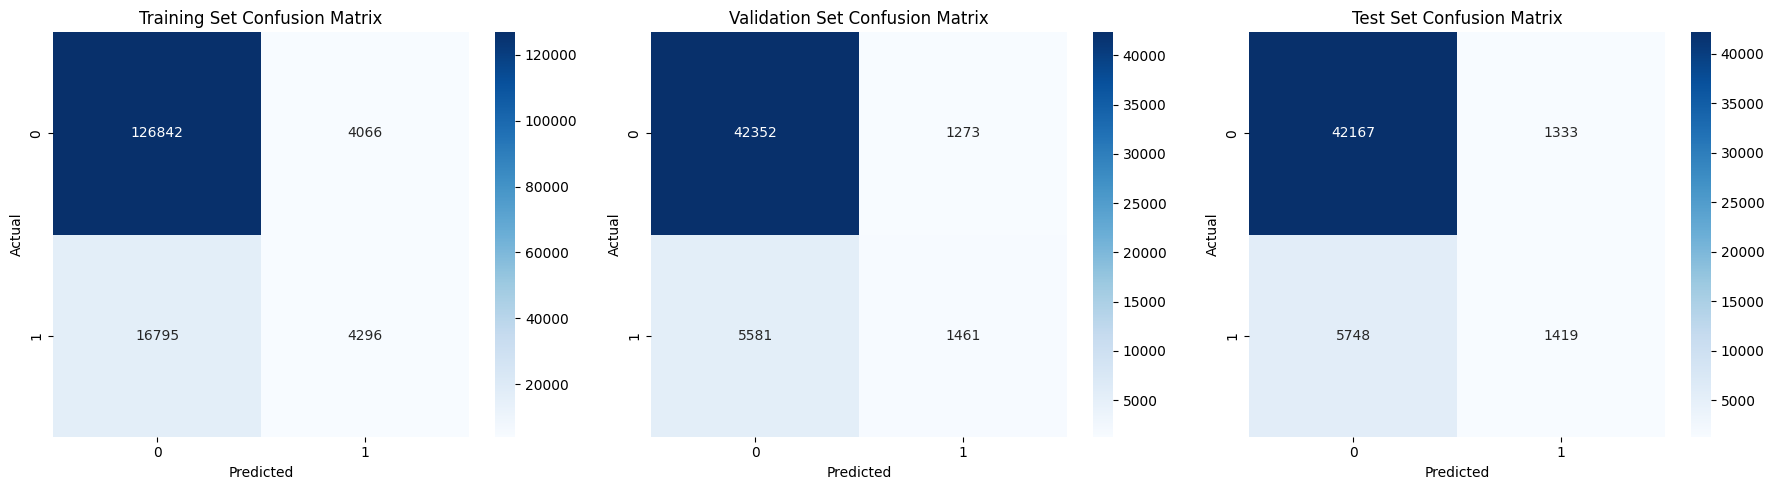

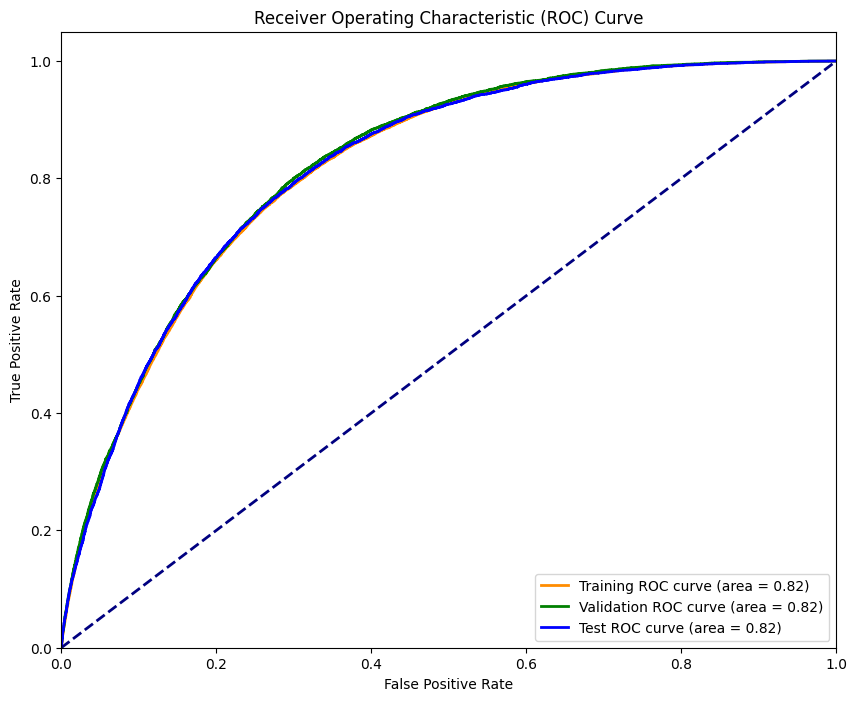

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the training, validation, and test sets
y_train_pred_lda = lda_model.predict(X_train)
y_val_pred_lda = lda_model.predict(X_val)
y_test_pred_lda = lda_model.predict(X_test)
# Print classification reports (includes precision, recall, f1-score, and support)
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred_lda))

print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred_lda))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred_lda))


# Calculate confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred_lda)
conf_matrix_val = confusion_matrix(y_val, y_val_pred_lda)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_lda)

# Calculate accuracy scores
accuracy_train = accuracy_score(y_train, y_train_pred_lda)
accuracy_val = accuracy_score(y_val, y_val_pred_lda)
accuracy_test = accuracy_score(y_test, y_test_pred_lda)


# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Set Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['0', '1']) # Updated labels
axes[0].set_yticklabels(['0', '1']) # Updated labels


sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Validation Set Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['0', '1']) # Updated labels
axes[1].set_yticklabels(['0', '1']) # Updated labels


sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Test Set Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_xticklabels(['0', '1']) # Updated labels
axes[2].set_yticklabels(['0', '1']) # Updated labels

plt.tight_layout()
plt.show()


# Calculate ROC curves and AUC
y_train_prob = lda_model.predict_proba(X_train)[:, 1]
y_val_prob = lda_model.predict_proba(X_val)[:, 1]
y_test_prob = lda_model.predict_proba(X_test)[:, 1]

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_numeric, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_val, tpr_val, thresholds_val = roc_curve(y_val_numeric, y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test_numeric, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Although the model generalizes well with similar performance across all datasets, it still exhibits quite poor recall for the minority class, indicating difficulty separating class 1 from class 0.

In [ ]:
# Get the feature names from X_train
feature_names = X_train.columns

# Get the coefficients from the trained LDA model
coefficients = lda_model.coef_[0]

# Create a pandas Series to associate coefficients with feature names
coef_series = pd.Series(coefficients, index=feature_names)

# Display the coefficients with predictor names
print("Discriminant Function Coefficients:")
print(coef_series)
print("\nIntercept:", lda_model.intercept_[0])

Discriminant Function Coefficients:
HighBP                  0.731441
HighChol                0.550650
CholCheck               0.429144
BMI                     0.076142
Smoker                 -0.058603
Stroke                  0.425958
HeartDiseaseorAttack    0.681965
PhysActivity           -0.072947
Fruits                  0.011419
Veggies                -0.047441
HvyAlcoholConsump      -0.523783
AnyHealthcare           0.113335
NoDocbcCost            -0.024537
GenHlth                 0.464343
MentHlth               -0.006179
PhysHlth                0.001301
DiffWalk                0.375048
Sex                     0.152794
Age                     0.074460
Education              -0.035209
Income                 -0.059036
dtype: float64

Intercept: -6.916556620445842


# KNN Model Iteration 1

## Iteration 1 - Default K

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val_knn = knn_classifier.predict(X_val)

### Model Assessment Iteration 1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd # Import pandas if not already imported in this cell

# Evaluate on the training set
y_pred_train_knn = knn_classifier.predict(X_train)

# Convert y_train and y_pred_train_knn to numeric for metric calculation
y_train_numeric = pd.to_numeric(y_train)
y_pred_train_knn_numeric = pd.to_numeric(y_pred_train_knn)

accuracy_train = accuracy_score(y_train_numeric, y_pred_train_knn_numeric)
precision_train = precision_score(y_train_numeric, y_pred_train_knn_numeric)
recall_train = recall_score(y_train_numeric, y_pred_train_knn_numeric)
f1_train = f1_score(y_train_numeric, y_pred_train_knn_numeric)

print("Performance metrics for Training Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-score: {f1_train:.4f}")

# Evaluate on the validation set (predictions already made)
# Convert y_val and y_pred_val_knn to numeric for metric calculation
y_val_numeric = pd.to_numeric(y_val)
y_pred_val_knn_numeric = pd.to_numeric(y_pred_val_knn)

accuracy_val = accuracy_score(y_val_numeric, y_pred_val_knn_numeric)
precision_val = precision_score(y_val_numeric, y_pred_val_knn_numeric)
recall_val = recall_score(y_val_numeric, y_pred_val_knn_numeric)
f1_val = f1_score(y_val_numeric, y_pred_val_knn_numeric)

print("\nPerformance metrics for Validation Set:")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1-score: {f1_val:.4f}")

# Evaluate on the test set
y_pred_test_knn = knn_classifier.predict(X_test)

# Convert y_test and y_pred_test_knn to numeric for metric calculation
y_test_numeric = pd.to_numeric(y_test)
y_pred_test_knn_numeric = pd.to_numeric(y_pred_test_knn)

accuracy_test = accuracy_score(y_test_numeric, y_pred_test_knn_numeric)
precision_test = precision_score(y_test_numeric, y_pred_test_knn_numeric)
recall_test = recall_score(y_test_numeric, y_pred_test_knn_numeric)
f1_test = f1_score(y_test_numeric, y_pred_test_knn_numeric)

print("\nPerformance metrics for Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")

Performance metrics for Training Set:
Accuracy: 0.8857
Precision: 0.6826
Recall: 0.3296
F1-score: 0.4446

Performance metrics for Validation Set:
Accuracy: 0.8487
Precision: 0.4057
Recall: 0.1913
F1-score: 0.2600

Performance metrics for Test Set:
Accuracy: 0.8456
Precision: 0.4042
Recall: 0.1925
F1-score: 0.2608


In [ ]:
# Print classification reports (includes precision, recall, f1-score, and support)
print("Training Set Classification Report:")
print(classification_report(y_train, y_pred_train_knn))

print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_pred_val_knn))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred_test_knn))

Training Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94    130908
         1.0       0.68      0.33      0.44     21091

    accuracy                           0.89    151999
   macro avg       0.79      0.65      0.69    151999
weighted avg       0.87      0.89      0.87    151999


Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     43625
         1.0       0.41      0.19      0.26      7042

    accuracy                           0.85     50667
   macro avg       0.64      0.57      0.59     50667
weighted avg       0.81      0.85      0.82     50667


Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     43500
         1.0       0.40      0.19      0.26      7167

    accuracy                           0.85     50667
   macro avg       0

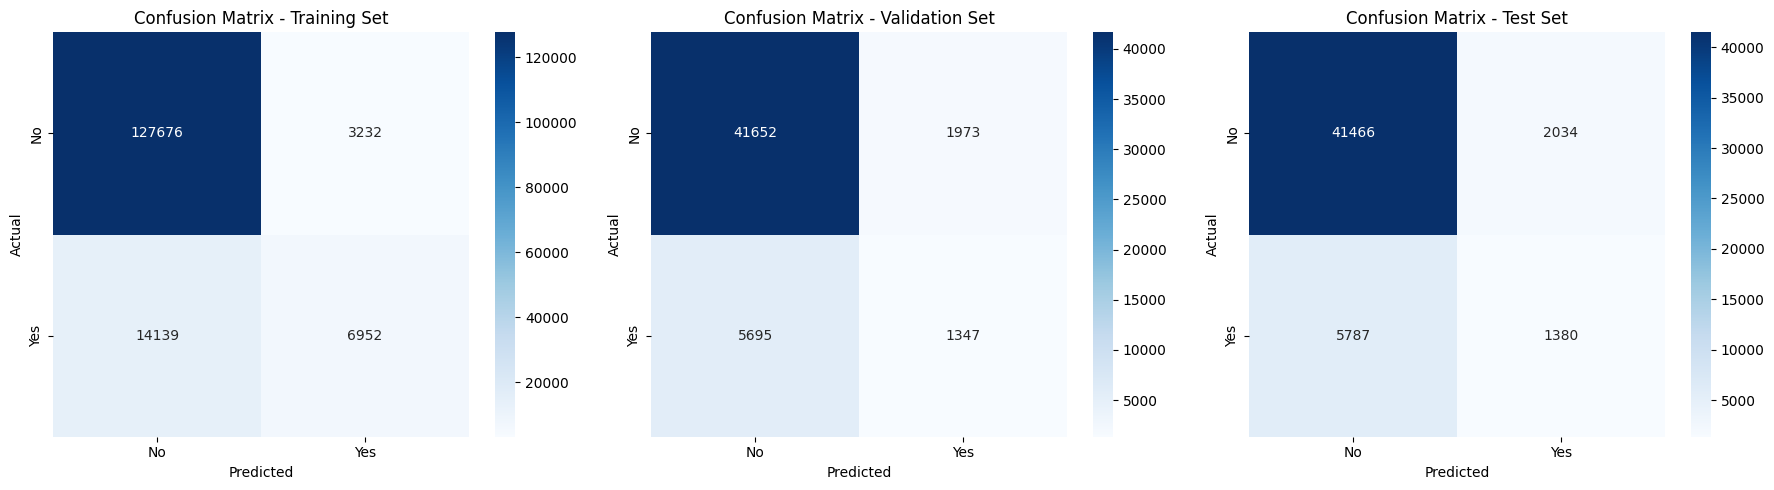

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns

# Confusion matrix for training set
sns.heatmap(confusion_matrix(y_train, y_pred_train_knn), annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix - Training Set')

# Confusion matrix for validation set
sns.heatmap(confusion_matrix(y_val, y_pred_val_knn), annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix - Validation Set')

# Confusion matrix for test set
sns.heatmap(confusion_matrix(y_test, y_pred_test_knn), annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axes[2])
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_title('Confusion Matrix - Test Set')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

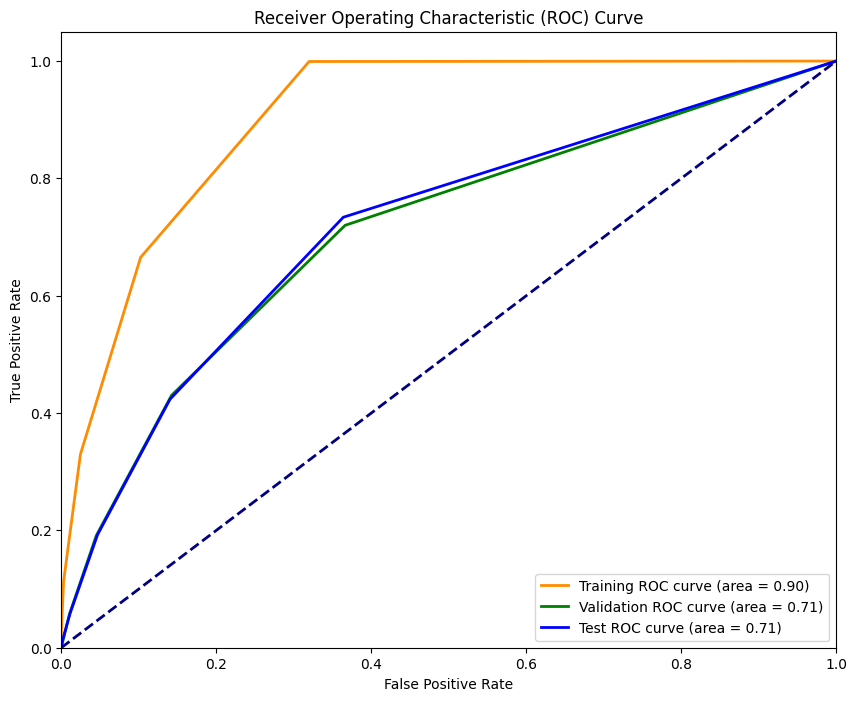

In [ ]:
# Calculate ROC curves and AUC
y_train_prob = knn_classifier.predict_proba(X_train)[:, 1]
y_val_prob = knn_classifier.predict_proba(X_val)[:, 1]
y_test_prob = knn_classifier.predict_proba(X_test)[:, 1]

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_numeric, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_val, tpr_val, thresholds_val = roc_curve(y_val_numeric, y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test_numeric, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Although with default K, the model maintains similar accuracy across all datasets, it exhibits a substantial decline in minority class recall in validation and test set, indicating limited ability to generalize the class of interest and a mild overfiting.

## Iteration 2 - Optimal K

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a range of n_neighbors values to try
n_neighbors_range = [1,5,10,15,20] # Example range from 1 to 20

# Create lists to store results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Convert y_val to numeric type for metric calculation
y_val_numeric = pd.to_numeric(y_val)

# Iterate through the range of n_neighbors values
for n in n_neighbors_range:
    # Initialize the KNN classifier with the current n_neighbors
    knn_classifier = KNeighborsClassifier(n_neighbors=n)

    # Train the model
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred_val = knn_classifier.predict(X_val)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_val_numeric, pd.to_numeric(y_pred_val))
    precision = precision_score(y_val_numeric, pd.to_numeric(y_pred_val))
    recall = recall_score(y_val_numeric, pd.to_numeric(y_pred_val))
    f1 = f1_score(y_val_numeric, pd.to_numeric(y_pred_val))

    # Store the scores
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

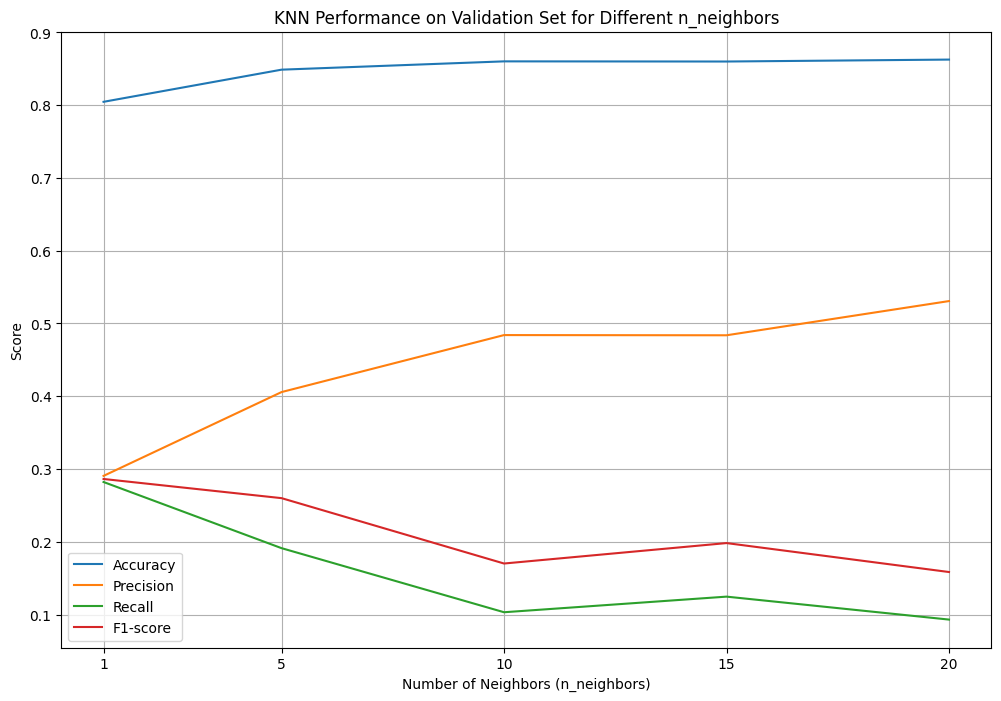

In [ ]:
# Plot the performance metrics for each n_neighbors
plt.figure(figsize=(12, 8))

plt.plot(n_neighbors_range, accuracy_scores, label='Accuracy')
plt.plot(n_neighbors_range, precision_scores, label='Precision')
plt.plot(n_neighbors_range, recall_scores, label='Recall')
plt.plot(n_neighbors_range, f1_scores, label='F1-score')

plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Score')
plt.title('KNN Performance on Validation Set for Different n_neighbors')
plt.xticks(n_neighbors_range)
plt.legend()
plt.grid(True)
plt.show()

Since 5 is the default k and k = 1 usually casuses overfits, experimenting with k=15.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with n_neighbors=5
knn_classifier_15 = KNeighborsClassifier(n_neighbors=15)

# Train the model
knn_classifier_15.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val_15 = knn_classifier_15.predict(X_val)

### Model Assessment Iteration 2

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd # Import pandas if not already imported in this cell

# Evaluate on the training set
y_pred_train_15 = knn_classifier_15.predict(X_train)

# Convert y_train and y_pred_train_15 to numeric for metric calculation
y_train_numeric = pd.to_numeric(y_train)
y_pred_train_15_numeric = pd.to_numeric(y_pred_train_15)

accuracy_train = accuracy_score(y_train_numeric, y_pred_train_15_numeric)
precision_train = precision_score(y_train_numeric, y_pred_train_15_numeric)
recall_train = recall_score(y_train_numeric, y_pred_train_15_numeric)
f1_train = f1_score(y_train_numeric, y_pred_train_15_numeric)

print("Performance metrics for Training Set (n_neighbors=15):")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-score: {f1_train:.4f}")

# Evaluate on the validation set (predictions already made)
# Convert y_val and y_pred_val_15 to numeric for metric calculation
y_val_numeric = pd.to_numeric(y_val)
y_pred_val_15_numeric = pd.to_numeric(y_pred_val_15)

accuracy_val = accuracy_score(y_val_numeric, y_pred_val_15_numeric)
precision_val = precision_score(y_val_numeric, y_pred_val_15_numeric)
recall_val = recall_score(y_val_numeric, y_pred_val_15_numeric)
f1_val = f1_score(y_val_numeric, y_pred_val_15_numeric)

print("\nPerformance metrics for Validation Set (n_neighbors=15):")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1-score: {f1_val:.4f}")

# Evaluate on the test set
y_pred_test_15 = knn_classifier_15.predict(X_test)

# Convert y_test and y_pred_test_15 to numeric for metric calculation
y_test_numeric = pd.to_numeric(y_test)
y_pred_test_15_numeric = pd.to_numeric(y_pred_test_15)

accuracy_test = accuracy_score(y_test_numeric, y_pred_test_15_numeric)
precision_test = precision_score(y_test_numeric, y_pred_test_15_numeric)
recall_test = recall_score(y_test_numeric, y_pred_test_15_numeric)
f1_test = f1_score(y_test_numeric, y_pred_test_15_numeric)

print("\nPerformance metrics for Test Set (n_neighbors=15):")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")

Performance metrics for Training Set (n_neighbors=15):
Accuracy: 0.8709
Precision: 0.6339
Recall: 0.1650
F1-score: 0.2619

Performance metrics for Validation Set (n_neighbors=15):
Accuracy: 0.8598
Precision: 0.4837
Recall: 0.1247
F1-score: 0.1983

Performance metrics for Test Set (n_neighbors=15):
Accuracy: 0.8573
Precision: 0.4831
Recall: 0.1214
F1-score: 0.1940


In [ ]:
# Print classification reports (includes precision, recall, f1-score, and support)
print("Training Set Classification Report:")
print(classification_report(y_train, y_pred_train_15))

print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_pred_val_15))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred_test_15))

Training Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    130908
         1.0       0.63      0.17      0.26     21091

    accuracy                           0.87    151999
   macro avg       0.76      0.57      0.60    151999
weighted avg       0.85      0.87      0.84    151999


Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43625
         1.0       0.48      0.12      0.20      7042

    accuracy                           0.86     50667
   macro avg       0.68      0.55      0.56     50667
weighted avg       0.82      0.86      0.82     50667


Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43500
         1.0       0.48      0.12      0.19      7167

    accuracy                           0.86     50667
   macro avg       0

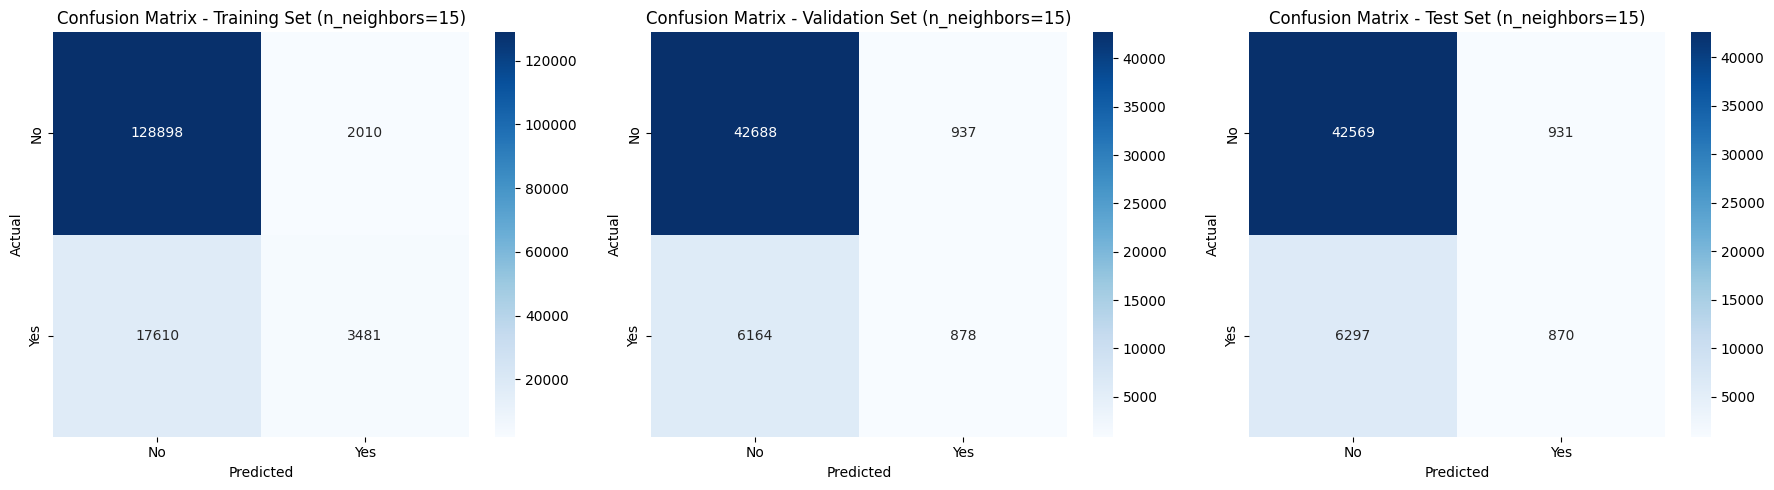

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns

# Confusion matrix for training set
sns.heatmap(confusion_matrix(y_train, y_pred_train_15), annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix - Training Set (n_neighbors=15)')

# Confusion matrix for validation set
sns.heatmap(confusion_matrix(y_val, y_pred_val_15), annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix - Validation Set (n_neighbors=15)')

# Confusion matrix for test set
sns.heatmap(confusion_matrix(y_test, y_pred_test_15), annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axes[2])
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_title('Confusion Matrix - Test Set (n_neighbors=15)')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

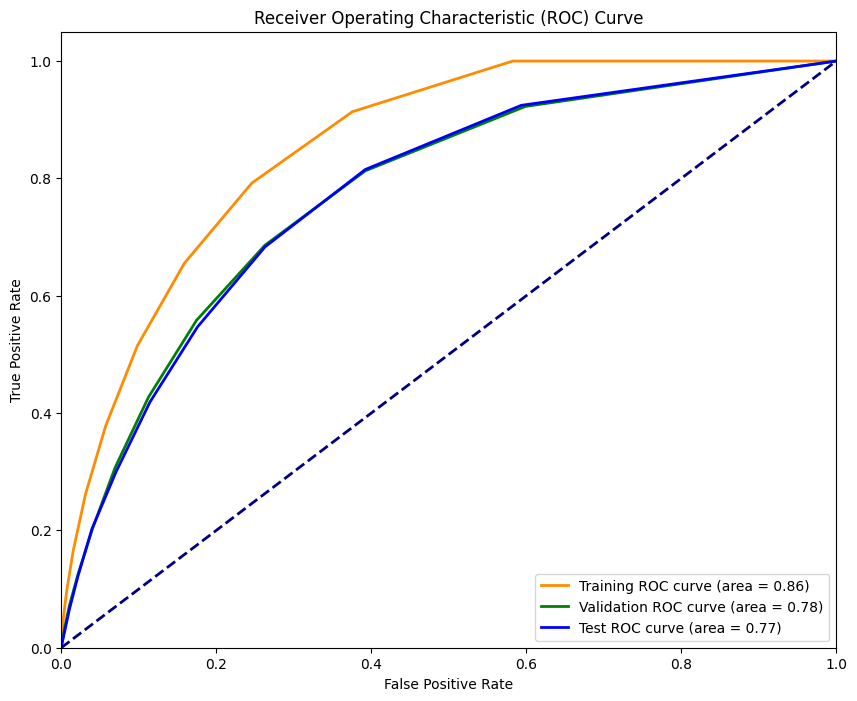

In [ ]:
# Calculate ROC curves and AUC
y_train_prob = knn_classifier_15.predict_proba(X_train)[:, 1]
y_val_prob = knn_classifier_15.predict_proba(X_val)[:, 1]
y_test_prob = knn_classifier_15.predict_proba(X_test)[:, 1]

# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_numeric, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_val, tpr_val, thresholds_val = roc_curve(y_val_numeric, y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test_numeric, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_val, tpr_val, color='green', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes Model

## Iteration 1 - All Features

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model using the training data
gnb_model.fit(X_train, y_train)

print("Gaussian Naive Bayes model trained successfully.")

Gaussian Naive Bayes model trained successfully.


### Model Assessment Iteration 1

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the training, validation, and test sets
y_train_pred_gnb = gnb_model.predict(X_train)
y_val_pred_gnb = gnb_model.predict(X_val)
y_test_pred_gnb = gnb_model.predict(X_test)

# Print the classification reports
print("Training Set Classification Report (Naive Bayes):")
print(classification_report(y_train, y_train_pred_gnb))

print("\nValidation Set Classification Report (Naive Bayes):")
print(classification_report(y_val, y_val_pred_gnb))

print("\nTest Set Classification Report (Naive Bayes):")
print(classification_report(y_test, y_test_pred_gnb))

Training Set Classification Report (Naive Bayes):
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86    130908
         1.0       0.32      0.57      0.41     21091

    accuracy                           0.77    151999
   macro avg       0.62      0.69      0.64    151999
weighted avg       0.84      0.77      0.80    151999


Validation Set Classification Report (Naive Bayes):
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     43625
         1.0       0.33      0.57      0.42      7042

    accuracy                           0.78     50667
   macro avg       0.62      0.69      0.64     50667
weighted avg       0.84      0.78      0.80     50667


Test Set Classification Report (Naive Bayes):
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     43500
         1.0       0.33      0.57      0.42      7167

    accuracy                    

The Naive Bayes model shows stable generalization across all datasets with quite strong recall for the minority class, but its low precision makes it prone to producing many false positives.

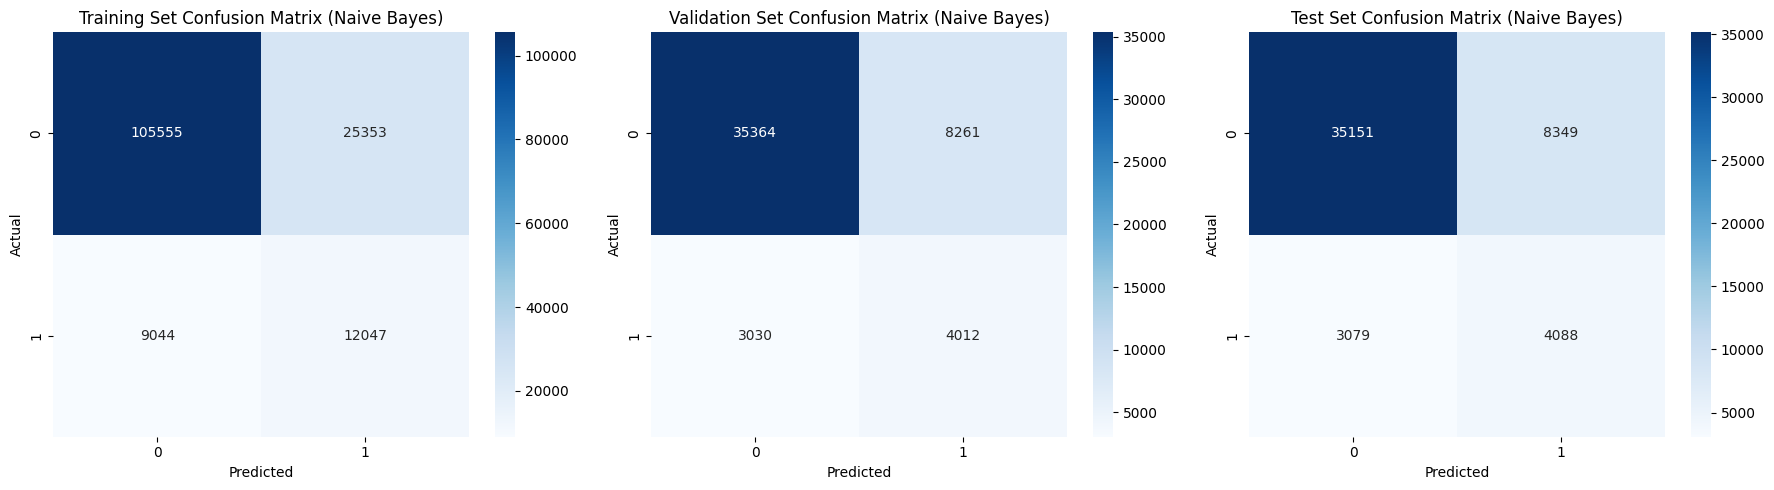

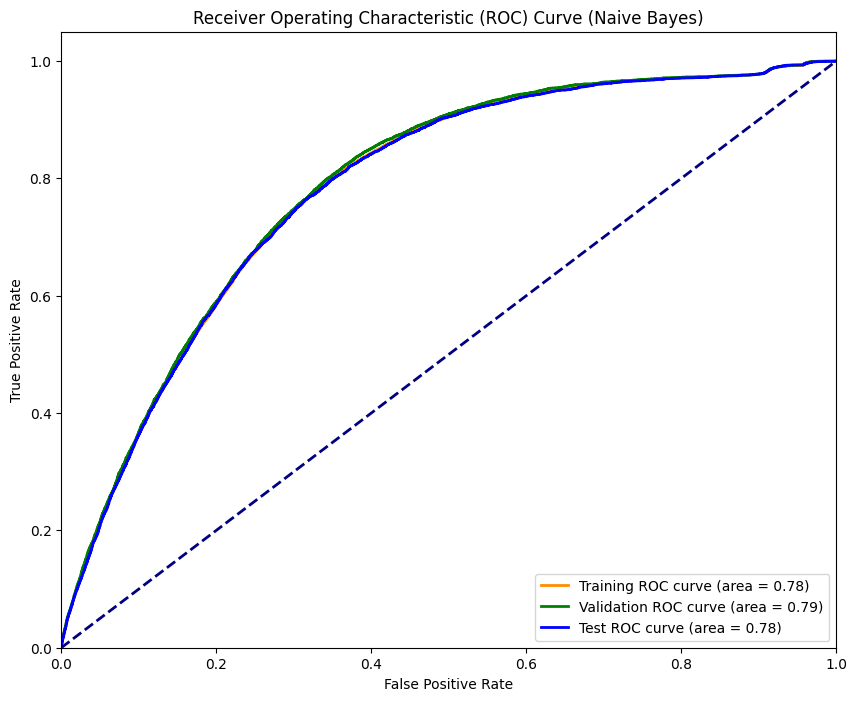

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions and get probabilities on the training, validation, and test sets
y_train_pred_gnb = gnb_model.predict(X_train)
y_val_pred_gnb = gnb_model.predict(X_val)
y_test_pred_gnb = gnb_model.predict(X_test)

y_train_prob_gnb = gnb_model.predict_proba(X_train)[:, 1]
y_val_prob_gnb = gnb_model.predict_proba(X_val)[:, 1]
y_test_prob_gnb = gnb_model.predict_proba(X_test)[:, 1]


# Calculate confusion matrices
conf_matrix_train_gnb = confusion_matrix(y_train, y_train_pred_gnb)
conf_matrix_val_gnb = confusion_matrix(y_val, y_val_pred_gnb)
conf_matrix_test_gnb = confusion_matrix(y_test, y_test_pred_gnb)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(conf_matrix_train_gnb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Set Confusion Matrix (Naive Bayes)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['0', '1']) # Corrected labels
axes[0].set_yticklabels(['0', '1']) # Corrected labels


sns.heatmap(conf_matrix_val_gnb, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Validation Set Confusion Matrix (Naive Bayes)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['0', '1']) # Corrected labels
axes[1].set_yticklabels(['0', '1']) # Corrected labels


sns.heatmap(conf_matrix_test_gnb, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Test Set Confusion Matrix (Naive Bayes)')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_xticklabels(['0', '1']) # Corrected labels
axes[2].set_yticklabels(['0', '1']) # Corrected labels

plt.tight_layout()
plt.show()


# Calculate ROC curves and AUC
# Convert y_train, y_val, and y_test to numeric type
y_train_numeric = pd.to_numeric(y_train)
y_val_numeric = pd.to_numeric(y_val)
y_test_numeric = pd.to_numeric(y_test)

fpr_train_gnb, tpr_train_gnb, thresholds_train_gnb = roc_curve(y_train_numeric, y_train_prob_gnb)
roc_auc_train_gnb = auc(fpr_train_gnb, tpr_train_gnb)

fpr_val_gnb, tpr_val_gnb, thresholds_val_gnb = roc_curve(y_val_numeric, y_val_prob_gnb)
roc_auc_val_gnb = auc(fpr_val_gnb, tpr_val_gnb)

fpr_test_gnb, tpr_test_gnb, thresholds_test_gnb = roc_curve(y_test_numeric, y_test_prob_gnb)
roc_auc_test_gnb = auc(fpr_test_gnb, tpr_test_gnb)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train_gnb, tpr_train_gnb, color='darkorange', lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_train_gnb)
plt.plot(fpr_val_gnb, tpr_val_gnb, color='green', lw=2, label='Validation ROC curve (area = %0.2f)' % roc_auc_val_gnb)
plt.plot(fpr_test_gnb, tpr_test_gnb, color='blue', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test_gnb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()